## Demo MINT

In [4]:
# Imports

import os
import imageio
import trackpy as tp
import numpy as np
import pandas as pd
import traj_calc as ft
import matplotlib.pyplot as plt

from data_extraction import inst_velocity, confinement
from denoising import tophat, wavelet
from output import image_output
from traj_calc import *

tp.quiet([True])

%matplotlib inline

ModuleNotFoundError: No module named 'traj_calc'

### Ouverture des fichiers

(1765, 350, 512)


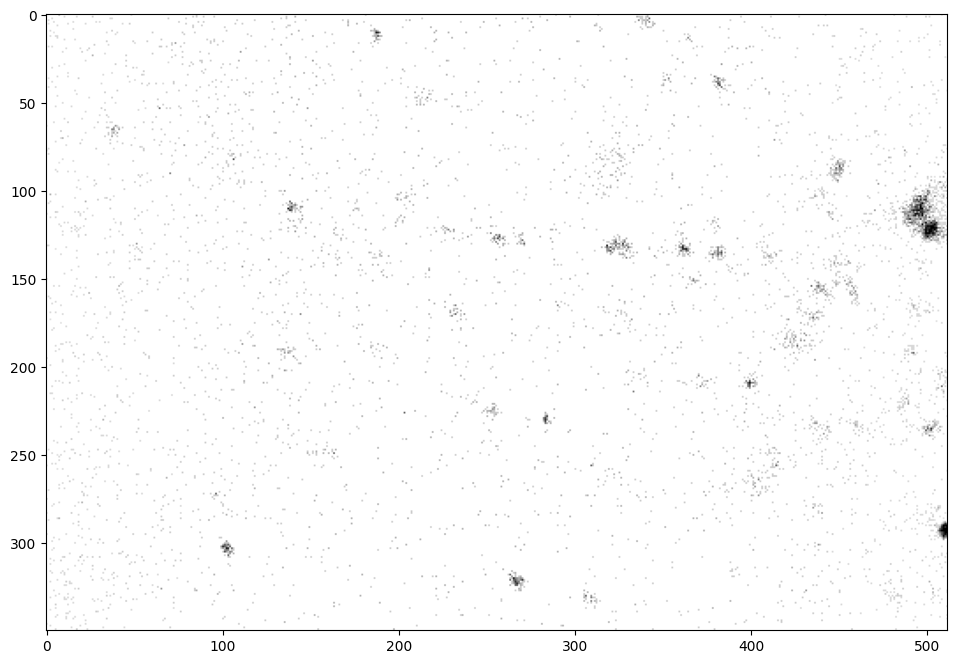

In [2]:
path = r'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_droit/190205_nanoKTP_kif5a.lif - Series006.tif'

frames = imageio.volread(path)

print(frames.shape)

plt.figure(figsize=(12,8))
plt.imshow(frames[0], cmap='gray_r')

### Débruitage : filtre à ondelettes

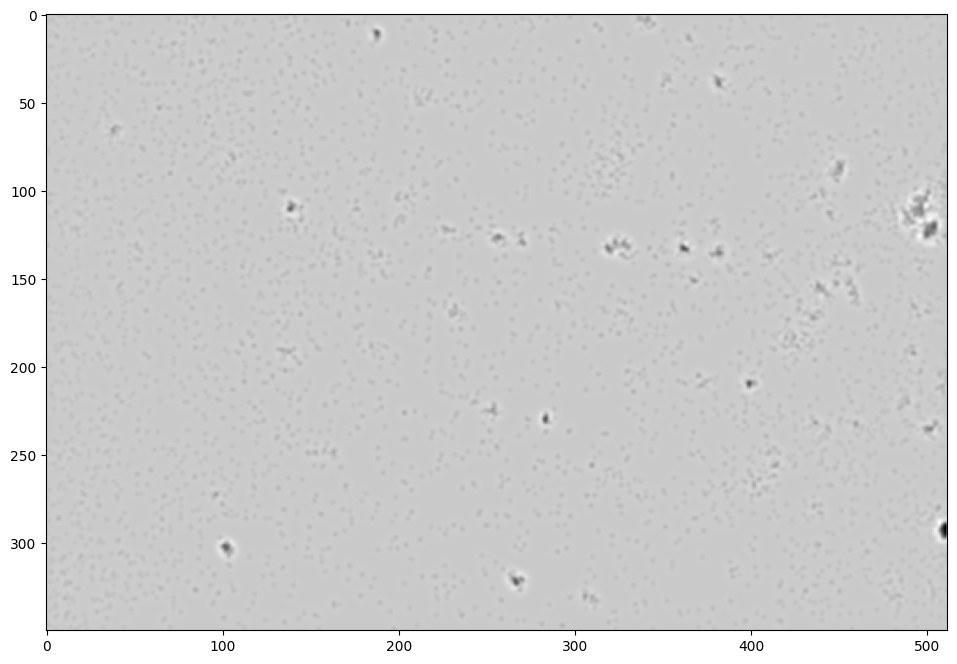

In [3]:
filtered_frames = wavelet(frames[0])

plt.figure(figsize=(12,8))
plt.imshow(filtered_frames, cmap='gray_r')

### Localisation

In [21]:
coordinates = tp.locate(frames[0], 
                       minmass=600, 
                       diameter=9,
                       separation=12,
                       preprocess=False,
                       engine='numba')

coordinates.head()

,y,x,mass,size,ecc,signal,raw_mass,ep
4,10.906206,187.258049,2143.0,2.115207,0.216014,234.0,2143.0,0.0
22,36.074543,351.881857,711.0,2.292592,0.104802,127.0,711.0,0.0
26,38.476824,381.312623,2028.0,2.239263,0.132998,186.0,2028.0,0.0
44,65.334142,38.343851,1236.0,2.268398,0.166743,133.0,1236.0,0.0
52,79.998745,325.265997,797.0,2.670767,0.411593,80.0,797.0,0.0


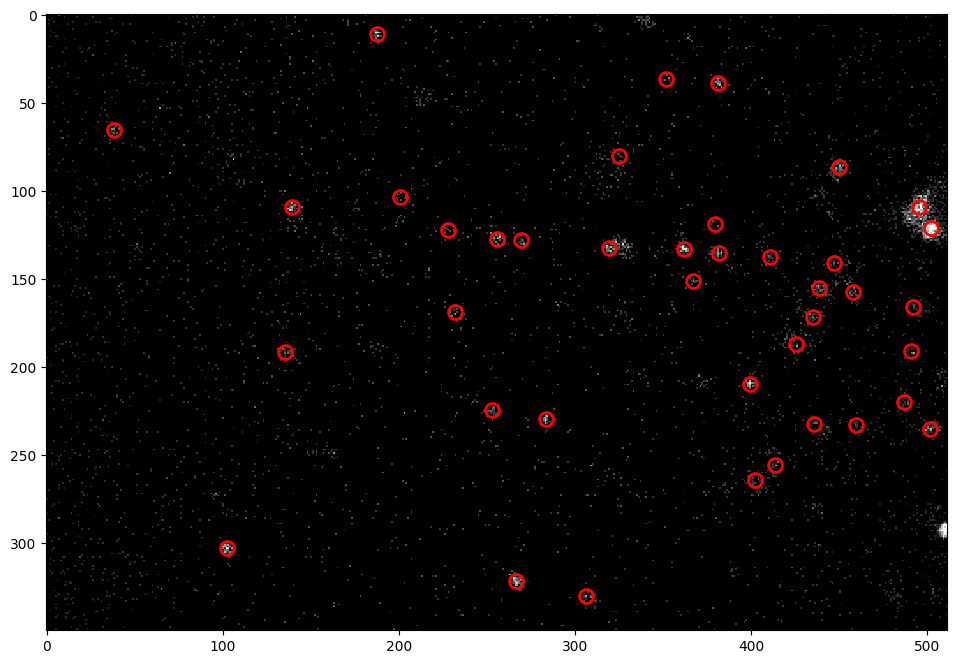

In [22]:
plt.figure(figsize=(12,8))
tp.annotate(coordinates,frames[0],plot_style={'markersize':10},color='red')
plt.show()
plt.close()

In [23]:
f_coordinates = tp.locate(filtered_frames, 
                       minmass=300, 
                       diameter=9,
                       separation=12,
                       preprocess=False,
                       engine='numba')

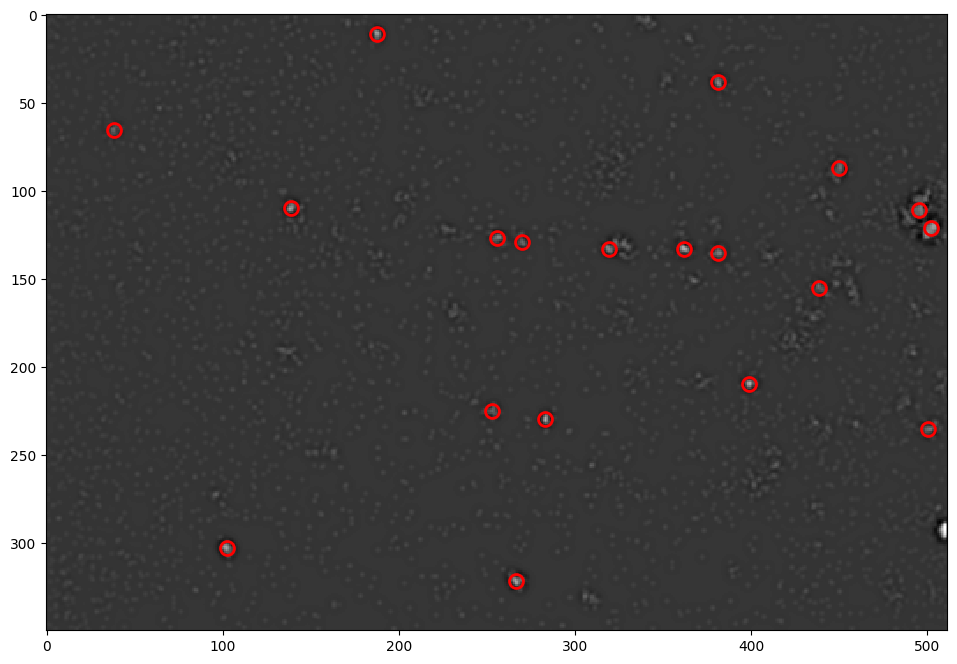

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(12,8))
tp.annotate(f_coordinates,filtered_frames,plot_style={'markersize':10},color='red')
plt.figtext(0.5,0.01,f'Number of particles found :  {len(coordinates)}', ha='center')
plt.show()
plt.close()

### Localisation sur un film

In [25]:
coordinates = tp.batch(frames, 
                       minmass=600, 
                       diameter=9,
                       separation=12,
                       preprocess=False,
                       engine='numba',
                       processes='auto')

coordinates

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,10.906206,187.258049,2143.0,2.115207,0.216014,234.0,2143.0,0.0,0
1,36.074543,351.881857,711.0,2.292592,0.104802,127.0,711.0,0.0,0
2,38.476824,381.312623,2028.0,2.239263,0.132998,186.0,2028.0,0.0,0
3,65.334142,38.343851,1236.0,2.268398,0.166743,133.0,1236.0,0.0,0
4,79.998745,325.265997,797.0,2.670767,0.411593,80.0,797.0,0.0,0
...,...,...,...,...,...,...,...,...,...
62086,276.879397,97.854774,1990.0,2.059297,0.070630,213.0,1990.0,0.0,1764
62087,320.121072,236.756990,3469.0,2.396728,0.108906,234.0,3469.0,0.0,1764
62088,330.237952,309.558735,664.0,2.381847,0.514323,133.0,664.0,0.0,1764
62089,327.732625,475.048263,1036.0,2.594358,0.087225,106.0,1036.0,0.0,1764


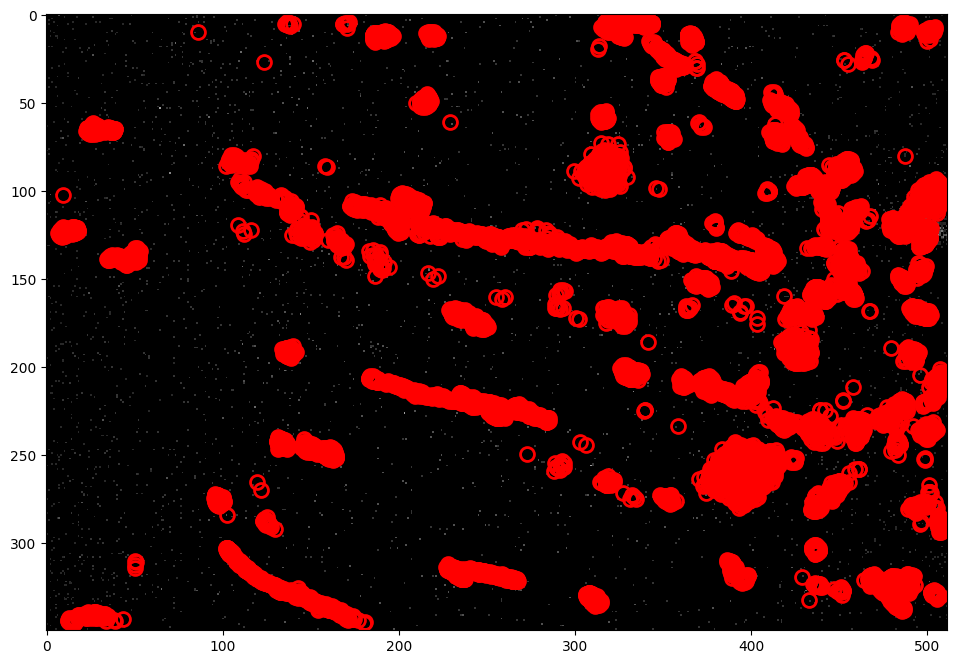

In [26]:
plt.figure(figsize=(12,8))
tp.annotate(coordinates,frames[0],plot_style={'markersize':10},color='red')
plt.show()
plt.close()

### Liaison des trajectoires

In [27]:
trajectories = tp.link(coordinates, 
                       search_range=6, 
                       adaptive_step=0.9, 
                       adaptive_stop=5,
                       memory=5)

trajectories

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,10.906206,187.258049,2143.0,2.115207,0.216014,234.0,2143.0,0.0,0,0
22,165.960184,492.163859,653.0,2.276789,0.135859,80.0,653.0,0.0,0,1
23,168.668810,231.647106,1244.0,2.688100,0.075767,160.0,1244.0,0.0,0,2
24,171.428571,435.285714,1113.0,2.246691,0.184308,159.0,1113.0,0.0,0,3
25,186.789474,425.421053,1007.0,2.665570,0.128447,159.0,1007.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...
62067,125.538974,487.385897,3900.0,2.670974,0.005531,213.0,3900.0,0.0,1764,4284
62068,128.974472,499.014974,7012.0,2.627415,0.121768,255.0,7012.0,0.0,1764,39
62069,131.383238,329.601844,3687.0,2.658637,0.120611,207.0,3687.0,0.0,1764,3918
62071,133.537012,360.462988,743.0,2.251364,0.072669,106.0,743.0,0.0,1764,4134


In [28]:
trajectories[trajectories.particle == 15]

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
37,302.815832,102.181745,3714.0,2.359515,0.146294,234.0,3714.0,0.0,0,15
73,302.612796,102.216134,3595.0,2.255884,0.169089,255.0,3595.0,0.0,1,15
113,302.918172,102.176674,3764.0,2.284204,0.072917,255.0,3764.0,0.0,2,15
159,303.041282,101.916950,4118.0,2.365775,0.042128,213.0,4118.0,0.0,3,15
203,303.522981,102.352461,3677.0,2.341291,0.076957,234.0,3677.0,0.0,4,15
...,...,...,...,...,...,...,...,...,...,...
23344,341.217391,173.749706,851.0,2.392212,0.382935,106.0,851.0,0.0,647,15
23381,343.051158,173.665058,1036.0,2.444756,0.132554,133.0,1036.0,0.0,648,15
23416,342.042386,174.001570,637.0,2.092072,0.327785,159.0,637.0,0.0,649,15
23450,343.078565,174.634336,1031.0,1.997088,0.356238,234.0,1031.0,0.0,650,15


In [29]:
trajectories.particle.nunique()

4285

In [30]:
trajectories = tp.filter_stubs(trajectories, 100)
trajectories.particle.nunique()

84

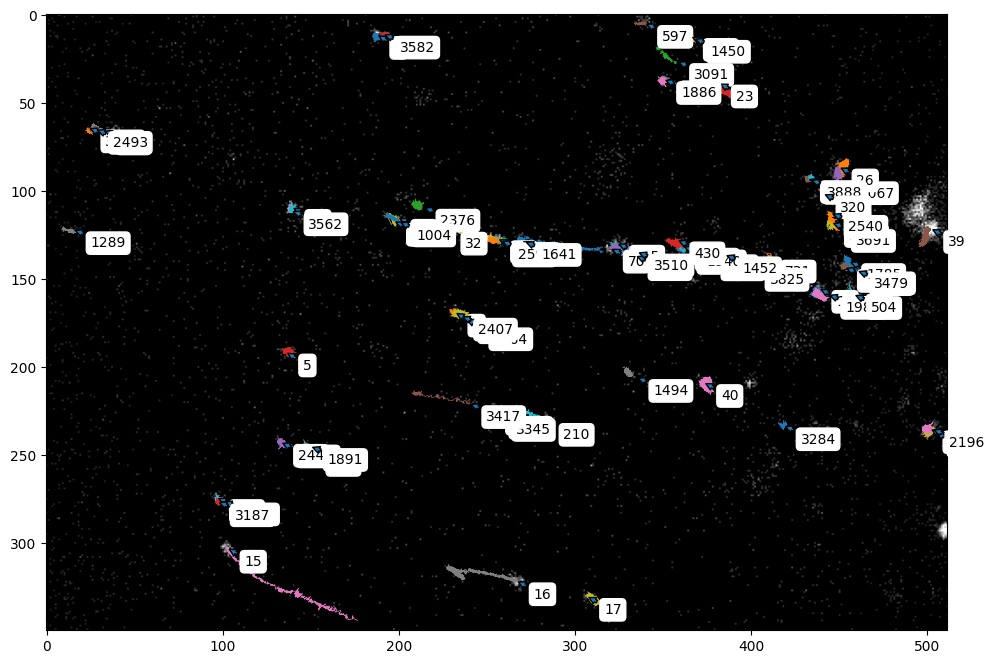

In [31]:
plt.figure(figsize=(12,8))
plt.imshow(frames[0], cmap='gray')
bbox_props = dict(boxstyle="round", fc="w", ec="w")
arrow_props = dict(arrowstyle="simple")

for item in set(trajectories.particle): # Loop for each sub trajectory
    x = trajectories[trajectories.particle==item].x
    y = trajectories[trajectories.particle==item].y
    plt.plot(x,y,lw=0.5)
    if len(trajectories)>1:
        x0,y0 = x.iloc[0],y.iloc[0]
        plt.annotate(str(item),xy=(x0,y0),xytext=(x0+10,y0+10),bbox=bbox_props,arrowprops=arrow_props, size = 10)

plt.show()

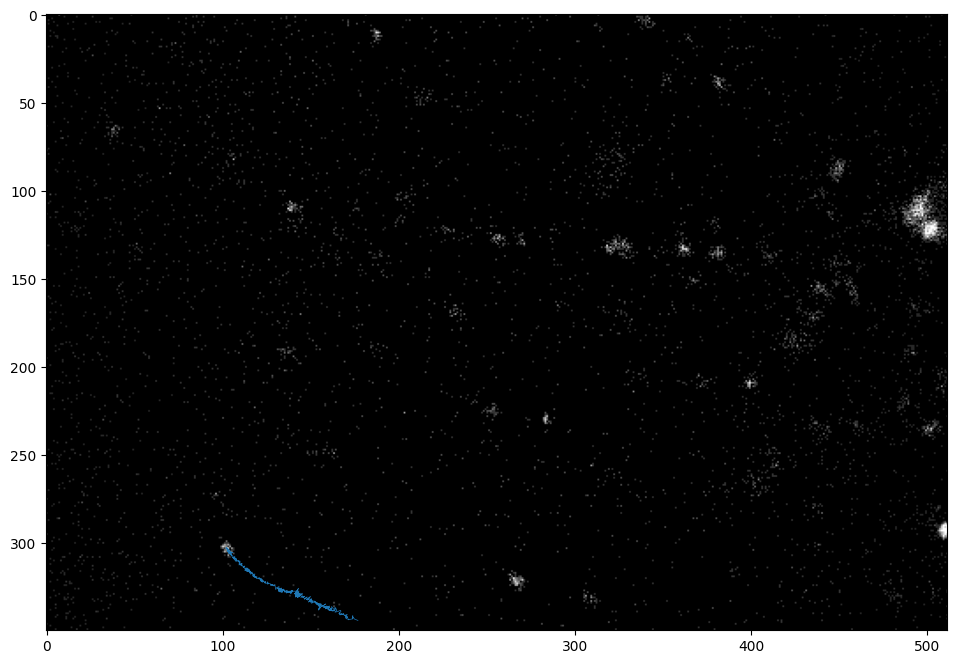

In [32]:
plt.figure(figsize=(12,8))
plt.imshow(frames[0], cmap='gray')
bbox_props = dict(boxstyle="round", fc="w", ec="w")
arrow_props = dict(arrowstyle="simple")


x = trajectories[trajectories.particle==15].x
y = trajectories[trajectories.particle==15].y
plt.plot(x,y,lw=0.5)


plt.show()

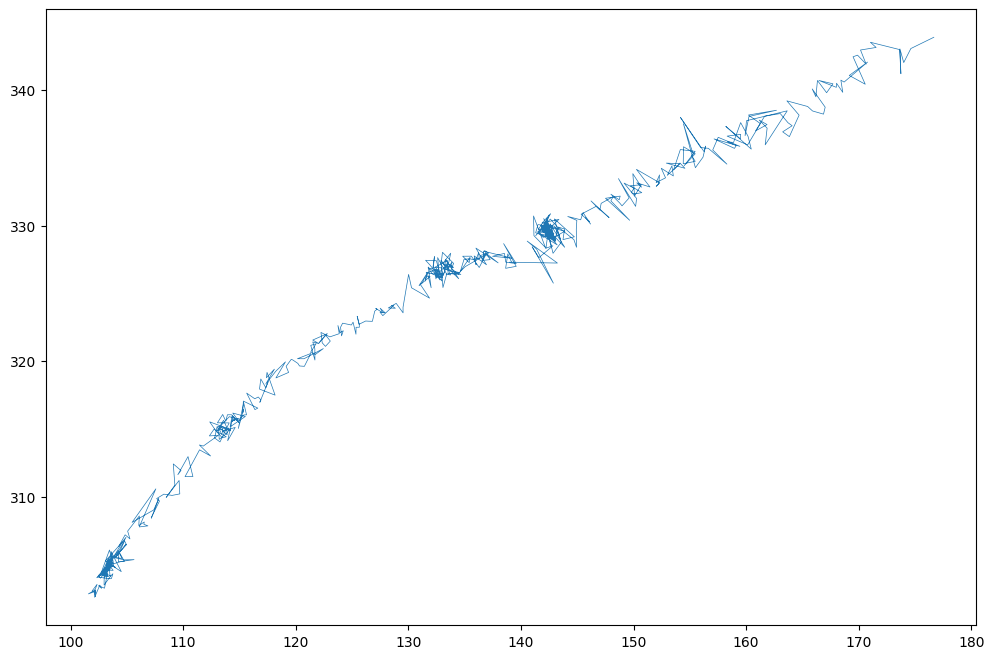

In [33]:
plt.figure(figsize=(12,8))
x = trajectories[trajectories.particle==15].x
y = trajectories[trajectories.particle==15].y
plt.plot(x,y,lw=0.5)

### Filtrage MSD

#### (Déplacement quadratique moyen)

In [34]:
trajectories = ft.MSD_calculation(trajectories, 0.173, 0.05)
trajectories

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd
frame,,,,,,,,,,,
0,10.906206,187.258049,2143.0,2.115207,0.216014,234.0,2143.0,0.0,0,0,1.018243
1,11.242112,186.096481,1648.0,2.224369,0.171092,160.0,1648.0,0.0,1,0,1.018243
2,11.084416,187.127373,2002.0,2.437429,0.120229,207.0,2002.0,0.0,2,0,1.018243
3,11.848344,186.324811,1721.0,2.279943,0.339999,160.0,1721.0,0.0,3,0,1.018243
4,12.123765,186.922138,1721.0,2.413525,0.104253,186.0,1721.0,0.0,4,0,1.018243
...,...,...,...,...,...,...,...,...,...,...,...
1757,11.348609,191.914894,611.0,2.244105,0.234550,160.0,611.0,0.0,1757,3582,0.239331
1758,12.080547,190.653495,658.0,1.819767,0.150562,133.0,658.0,0.0,1758,3582,0.239331
1759,11.188163,190.115724,1132.0,2.602662,0.307047,181.0,1132.0,0.0,1759,3582,0.239331


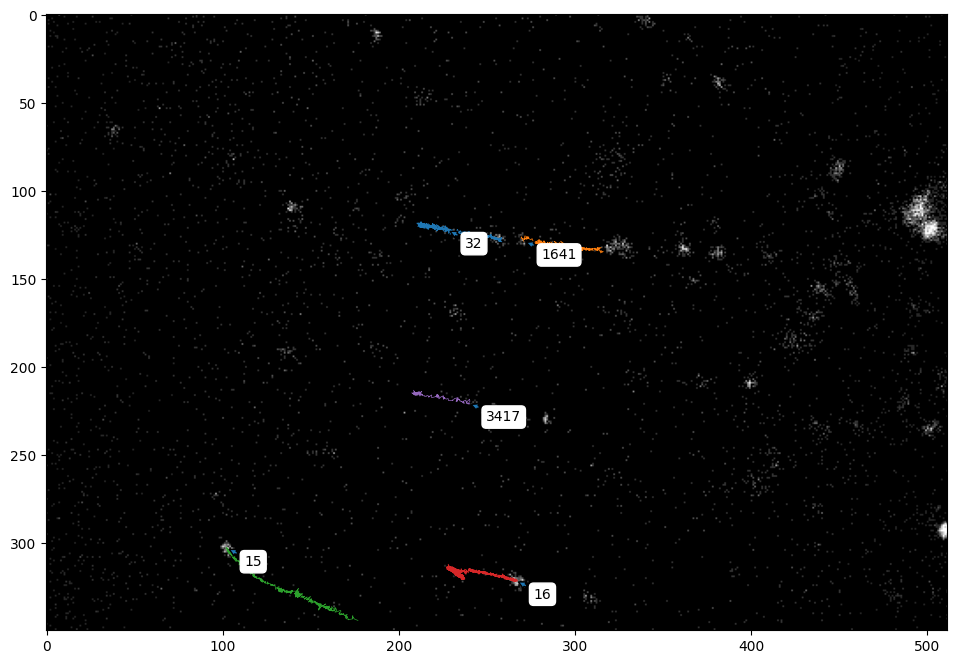

In [38]:
trajectories_msd = trajectories[trajectories.max_msd > 9]

plt.figure(figsize=(12,8))
plt.imshow(frames[0], cmap='gray')
bbox_props = dict(boxstyle="round", fc="w", ec="w")
arrow_props = dict(arrowstyle="simple")

for item in set(trajectories_msd.particle): # Loop for each sub trajectory
    x = trajectories_msd[trajectories_msd.particle==item].x
    y = trajectories_msd[trajectories_msd.particle==item].y
    plt.plot(x,y,lw=0.5)
    if len(trajectories)>1:
        x0,y0 = x.iloc[0],y.iloc[0]
        plt.annotate(str(item),xy=(x0,y0),xytext=(x0+10,y0+10),bbox=bbox_props,arrowprops=arrow_props, size = 10)

plt.show()

### Minimization

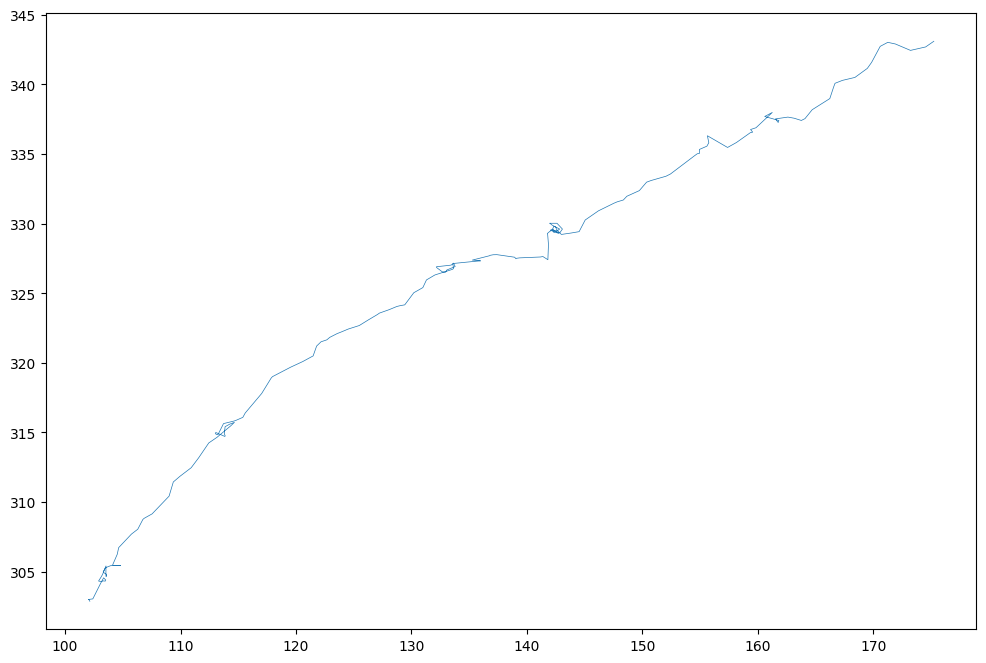

In [43]:
traj15 = trajectories_msd[trajectories_msd.particle==15]
traj15 = minimization(traj15,0.173,120)

plt.figure(figsize=(12,8))
x = traj15.x
y = traj15.y

x = x.dropna()
y = y.dropna()
x = x.reset_index(drop = True)
y = y.reset_index(drop = True)

plt.plot(x,y,lw=0.5)

### Vitesse instantanée

In [44]:
x = x*0.173
x = x.dropna()
y = y*0.173
y = y.dropna()

v_inst = inst_velocity(x,y, 0.05)
traj15['v_inst'] = v_inst

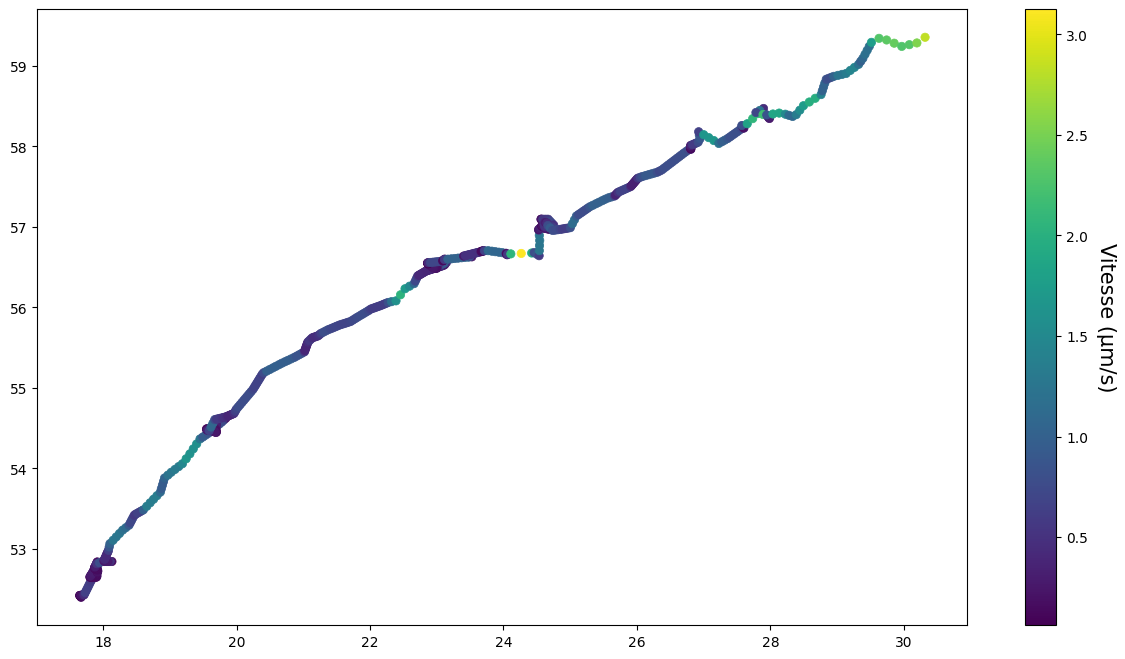

In [45]:
plt.figure(figsize=(15,8))
plt.scatter(x,y,lw=0.5,c=v_inst)
plt.colorbar().set_label('Vitesse (µm/s)', rotation = 270, labelpad = 20, size = 15)
plt.show()

### Rapport de confinement

In [46]:
r_conf = confinement(x,y,3)

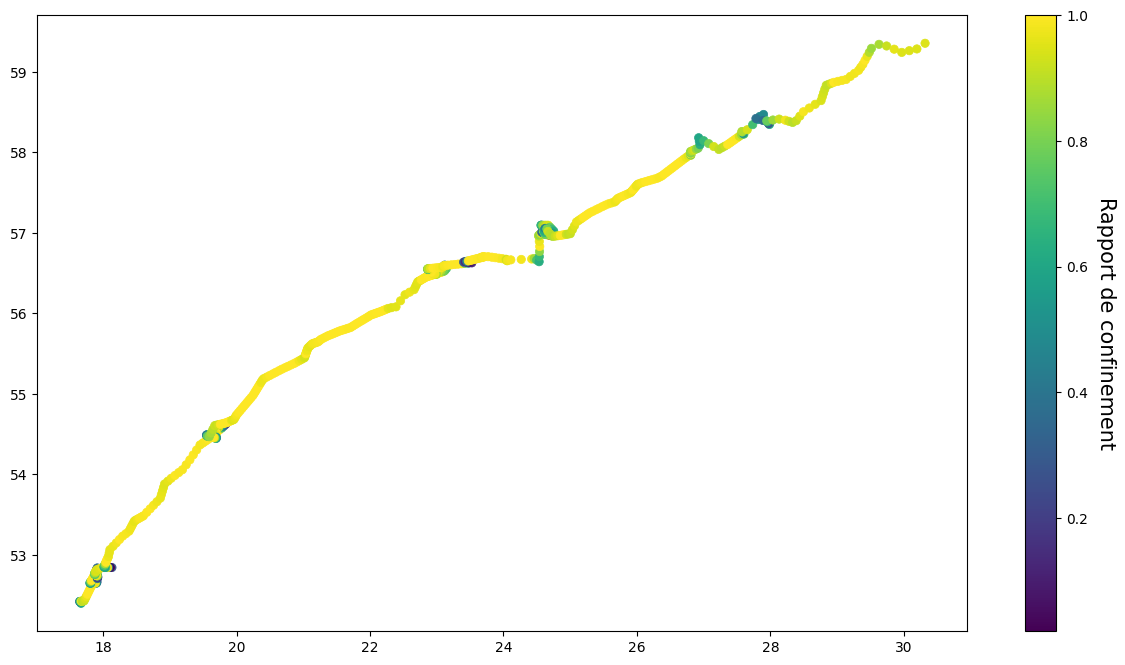

In [47]:
plt.figure(figsize=(15,8))
plt.scatter(x,y,lw=0.5,c=r_conf)
plt.colorbar().set_label('Rapport de confinement', rotation = 270, labelpad = 20, size = 15)

In [48]:
traj15['r_conf'] = r_conf

In [49]:
go = traj15[traj15.r_conf > 0.64]
stop = traj15[traj15.r_conf <= 0.64]

### Séparation par phases

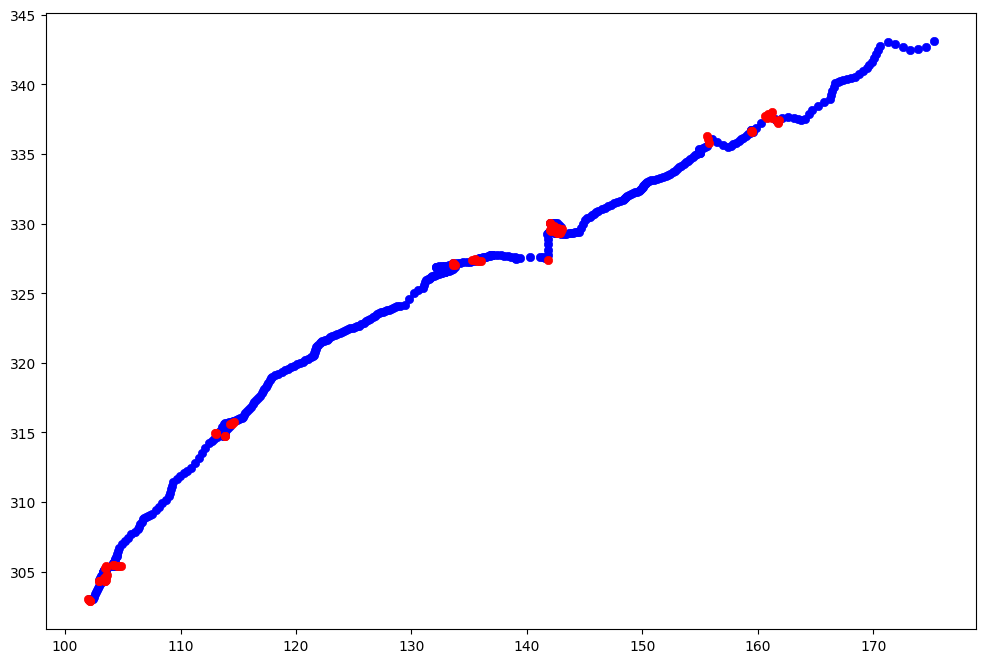

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(go.x,go.y,lw=0.5,c='b')
plt.scatter(stop.x,stop.y,lw=0.5,c='r')
plt.show()

In [2]:
def aa(x):
    return x*1

def bb(x):
    return x*-1

bb(2)

-2

In [4]:
fu = bb

fu(5)

-5

In [2]:
d = {'stub':False}

if d['stub']:
    print(3)

In [1]:
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def log_function_call(func):
    def wrapper(*args, **kwargs):
        arg_str = ', '.join([repr(arg) for arg in args])
        kwarg_str = ', '.join([f"{key}={value!r}" for key, value in kwargs.items()])
        all_args = ', '.join(filter(None, [arg_str, kwarg_str]))

        logging.info(f"Calling {func.__name__}({all_args})")
        result = func(*args, **kwargs)
        logging.info(f"{func.__name__} result: {result}")
        return result
    return wrapper

@log_function_call
def add(a, b):
    return a + b

@log_function_call
def multiply(a, b):
    return a * b

def main():
    result1 = add(3, 5)
    result2 = multiply(4, 6)

if __name__ == "__main__":
    main()

2023-08-28 14:29:19,944 - INFO - Calling add(3, 5)
2023-08-28 14:29:19,945 - INFO - add result: 8
2023-08-28 14:29:19,945 - INFO - Calling multiply(4, 6)
2023-08-28 14:29:19,945 - INFO - multiply result: 24


In [2]:
import logging
import functools

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def log_function_call(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        arg_str = ', '.join([repr(arg) for arg in args])
        kwarg_str = ', '.join([f"{key}={value!r}" for key, value in kwargs.items()])
        all_args = ', '.join(filter(None, [arg_str, kwarg_str]))

        logging.info(f"Calling {func.__name__}({all_args})")
        logging.info(f"{func.__name__} result: {result}")
        return result
    return wrapper

In [4]:
import time

@log_function_call
def ww(sec):
    time.sleep(sec)
    print('ok')


ww(5)

2023-08-28 14:39:33,101 - INFO - Calling ww(5)
2023-08-28 14:39:33,102 - INFO - ww result: None


ok


In [ ]:
def bioformat_reader(filepath):

    import javabridge
    import bioformats

    javabridge.start_vm(class_path=bioformats.JARS)
    reader = bioformats.ImageReader(filepath)
    psd95 = reader.read(series=8)
    metadata = bioformats.get_omexml_metadata(filepath)
    o = bioformats.OMEXML(metadata)
    javabridge.kill_vm()

In [10]:
import javabridge as jb

def _init_logger():
    """This is so that Javabridge doesn't spill out a lot of DEBUG messages
    during runtime.
    From CellProfiler/python-bioformats.
    """
    rootLoggerName = jb.get_static_field("org/slf4j/Logger",
                                         "ROOT_LOGGER_NAME",
                                         "Ljava/lang/String;")

    rootLogger = jb.static_call("org/slf4j/LoggerFactory",
                                "getLogger",
                                "(Ljava/lang/String;)Lorg/slf4j/Logger;",
                                rootLoggerName)

    logLevel = jb.get_static_field("ch/qos/logback/classic/Level",
                                   "WARN",
                                   "Lch/qos/logback/classic/Level;")

    jb.call(rootLogger,
            "setLevel",
            "(Lch/qos/logback/classic/Level;)V",
            logLevel)

In [11]:
import javabridge
import bioformats

javabridge.start_vm(class_path=bioformats.JARS)
logger = _init_logger()

path3 = r'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_gauche/190205_nanoKTP_kif5a.lif - Series003.tif'
path2 = r'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_gauche/substack.tif'

reader = bioformats.ImageReader(path3)


In [12]:
meta = bioformats.get_omexml_metadata(path3)
meta = bioformats.OMEXML(meta)

In [13]:
meta.image().Pixels.get_SizeT()

1765

In [54]:
meta.image().Pixels.PixelType

'uint8'

In [ ]:
reader2 = bioformats.ImageReader(path2)
meta2 = bioformats.get_omexml_metadata(path2)
meta2 = bioformats.OMEXML(meta2)

In [5]:
meta2.image().Pixels.get_SizeT()

1

In [17]:
img3 = bioformats.load_image(path3, t=1764)

In [18]:
img3.shape

(350, 512)

In [29]:
import numpy as np
frames = np.empty((meta.image().Pixels.get_SizeT(),meta.image().Pixels.get_SizeY(),meta.image().Pixels.get_SizeX()), dtype=np.uint8)
frames.shape

(1765, 350, 512)

In [40]:
for t in range(meta.image().Pixels.get_SizeT()):
    # frame = bioformats.load_image(path3, t=t)
    reader = bioformats.ImageReader(path3)
    frame = reader.read(t=t)
    frames[t] = frame

In [41]:
np.average(frames)

5.078283083771752e-05

In [32]:
frames.shape

(1765, 350, 512)

In [34]:
frames[680]
np.average(frames[680])

4.464285714285714e-05

In [36]:
frames[680].shape

(350, 512)

In [48]:
frames[680].dtype

dtype('uint8')

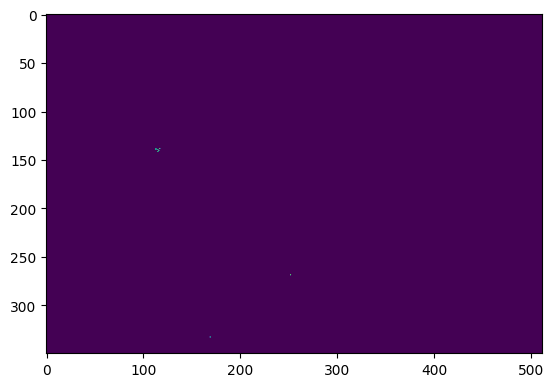

In [42]:
import matplotlib.pyplot as plt

plt.imshow(frames[680])

In [38]:
import imageio
ref_frames = imageio.volread(path3)

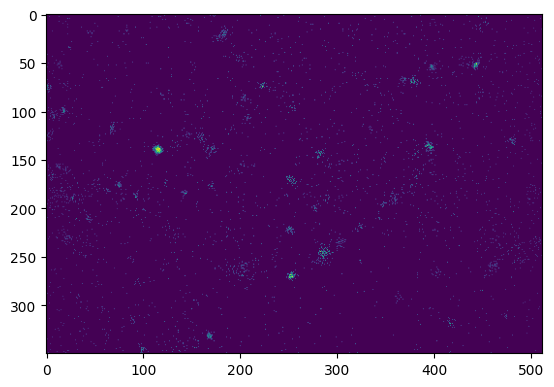

In [43]:
plt.imshow(ref_frames[680])

In [45]:
a = 5

assert a == 5

In [47]:
number = 0.2

assert number > 0 and isinstance(number, int), \
    f"number greater than 0 expected, got: {number}"

AssertionError: number greater than 0 expected, got: 0.2

In [55]:
def bioformats_reader(path):
    
    javabridge.start_vm(class_path=bioformats.JARS)
    logger = _init_logger()

    metadata = bioformats.get_omexml_metadata(path)
    metadata = bioformats.OMEXML(metadata)

    size_x = metadata.image().Pixels.get_SizeT()
    size_y = metadata.image().Pixels.get_SizeT()
    size_t = metadata.image().Pixels.get_SizeT()
    dtype = metadata.image().Pixels.PixelType

    frames = np.empty((size_t, size_y, size_x), dtype=dtype)

    for t in range(size_t):
        reader = bioformats.ImageReader(path)
        frame = reader.read(t=t)
        frames[t] = frame

    return frames

In [2]:
import imagej
ij = imagej.init()

[ERROR] Cannot create plugin: org.scijava.plugins.scripting.javascript.JavaScriptScriptLanguage


In [3]:
image_url = 'https://imagej.net/images/clown.jpg'
jimage = ij.io().open(image_url)

[INFO] Populating metadata


[java.lang.Enum.toString] [INFO] Populating metadata


In [4]:
image = ij.py.from_java(jimage)


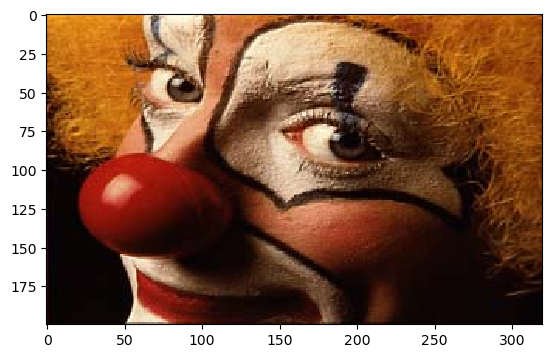

In [5]:
ij.py.show(image, cmap='gray')


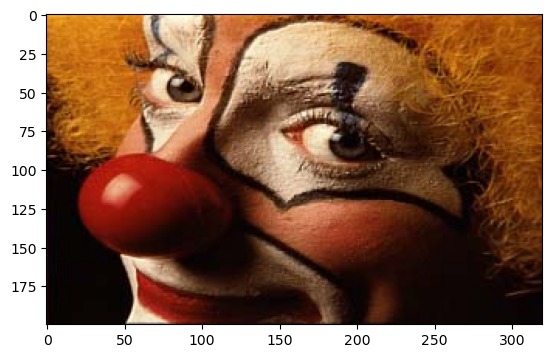

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [9]:
path3 = r'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_gauche/190205_nanoKTP_kif5a.lif - Series003.tif'

In [10]:
jimage = ij.io().open(path3)

In [11]:
image = ij.py.from_java(jimage)

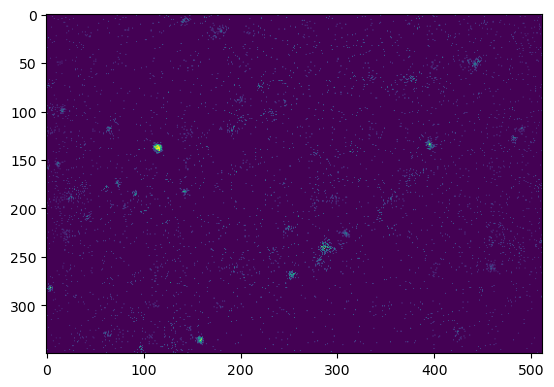

In [13]:
plt.imshow(image[0])

In [14]:
image.shape

(1765, 350, 512)

In [37]:
def pyimagej_reader(path):

    path = str(path) #jpype doesn't like PosixPath objects, apparently
    
    import imagej
    ij = imagej.init()
    jimage = ij.io().open(path)
    frames = ij.py.from_java(jimage)

    try:
        frames.shape
    except AttributeError:
        print(f'No reader found for {path.split(".")[-1]}')


    return frames

In [24]:
import jpype
jimage = ij.io().open(r'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_gauche/low.odt')
try:
    frames = ij.py.from_java(jimage)
except jpype.JException:
    print("No reader found")

[ERROR] No opener IOPlugin found for FileLocation:file:/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_gauche/low.odt.
[java.lang.Enum.toString] [ERROR] No opener IOPlugin found for FileLocation:file:/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_gauche/low.odt.


In [17]:
frames

""


In [38]:
from pathlib import Path

path = Path(r'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_gauche/190205_nanoKTP_kif5a.lif - Series003.tif')
# path = r'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_gauche/190205_nanoKTP_kif5a.lif - Series003.tif'

In [39]:
frames = pyimagej_reader(path)
frames.shape

(1765, 350, 512)

In [40]:
path = str(path)

In [43]:
s = path.split('.')
s[-1]

'tif'

In [48]:
len(frames.shape)

3

In [2]:
a = (1,2)
b = (1,2,3)
d = (1,2,3,4,5,6)

def c(s):
    if len(s) in {2,3}:
        print('aaa')

c(d)

In [3]:
len(a)

2

In [4]:
any([2,3])

True

In [6]:
if len(d) not in {2,3}:
    print('aa')

aa


In [8]:
try:
    len(b) in {2,3}
except:
    print('aa')

In [3]:
diameter_range=[7,12]
minmass_range=[250,350]
separation_range=[10,14]

In [4]:
for diameter in diameter_range:
    for minmass in minmass_range:
        for separation in separation_range:
            print(diameter, minmass, separation)

7 250 10
7 250 14
7 350 10
7 350 14
12 250 10
12 250 14
12 350 10
12 350 14


In [6]:
for diameter, minmass, separation in zip(diameter_range, minmass_range, separation_range):
    print(diameter, minmass, separation)

7 250 10
12 350 14


In [15]:
values = [(diameter, minmass, separation) for diameter in diameter_range for minmass in minmass_range for separation in separation_range]
print(values)

[(7, 250, 10), (7, 250, 14), (7, 350, 10), (7, 350, 14), (12, 250, 10), (12, 250, 14), (12, 350, 10), (12, 350, 14)]


In [17]:
for a,b,c in values:
    print(a)

7
7
7
7
12
12
12
12


In [1]:
import trackpy as tp
from imageio import volread
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numba

In [2]:
frames = volread(r'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_gauche/190205_nanoKTP_kif5a.lif - Series003.tif')
frames.shape

(1765, 350, 512)

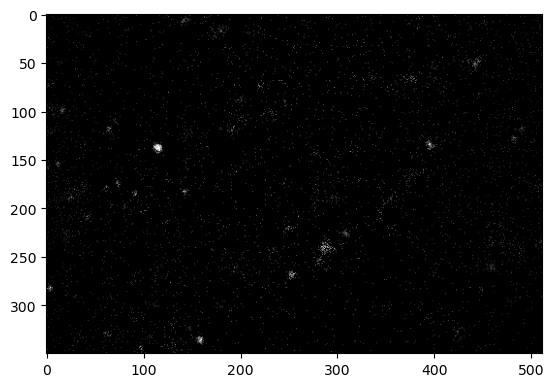

In [5]:
plt.imshow(frames[0], cmap='gray')

In [3]:
@interact(frame = fixed(frames[0]), diameter=(1,21,2), minmass=(0,500,1),separation=(0,20,1))
def test_locate(frame, diameter, minmass, separation):
    raw_coordinates = tp.locate(frame, minmass=minmass, diameter=diameter, \
        separation=separation,preprocess=False,engine='numba')

    plt.imshow(frame)
    plt.title("Locate parameters test",fontsize=10)
    plt.xlabel("x (pixels)",fontsize=10)
    plt.ylabel("y (pixels)",fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    tp.annotate(raw_coordinates,frame,plot_style={'markersize':10},color='red')
    plt.show()
    plt.close()

interactive(children=(IntSlider(value=11, description='diameter', max=21, min=1, step=2), IntSlider(value=250,…

In [3]:
class MainWindow():
    def __init__(self):
        self.test = 0 

In [4]:
mw = MainWindow()

In [5]:
mw.test

0

In [8]:
key = 'test'
eval(f'mw.{key}')

0

In [1]:
int('zer')

ValueError: invalid literal for int() with base 10: 'zer'

In [3]:
ada = None

val = (ada if ada is not None else 0)

val

0

In [6]:
s = '[HET,HOM,WT]'

In [7]:
s.split(',')

['[HET', 'HOM', 'WT]']

In [8]:
s.strip('[]')

'HET,HOM,WT'

In [15]:
stderr = '\n'

In [16]:
if stderr != '\n':
    print('ok')

In [14]:
root_input_folder = Path(str('/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_droit'))

In [2]:
path = r'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_droit/190205_nanoKTP_kif5a.lif - Series006.tif'

In [7]:
from pathlib import Path

In [18]:
path = Path(path)

In [17]:
str(root_input_folder)

'/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_droit'

In [19]:
path

PosixPath('/media/lumin/DATA/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_droit/190205_nanoKTP_kif5a.lif - Series006.tif')

In [15]:
output_subfolder = path.replace(str(root_input_folder),'')

TypeError: Path.replace() takes 2 positional arguments but 3 were given

In [6]:
output_subfolder

'/190205_nanoKTP_kif5a.lif - Series006.tif'

In [3]:
import numpy as np
import cv2
import imageio
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib tk

In [4]:
img = imageio.imread(r'/home/lumin/Documents/Test Devrim/MAX_20231123_KG_Exp46_Transport_CS6C_pos3008.tif')

/tmp/ipykernel_876423/98024213.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(r'/home/lumin/Documents/Test Devrim/MAX_20231123_KG_Exp46_Transport_CS6C_pos3008.tif')


In [52]:
img = np.flipud(img)

In [3]:
plt.imshow(img)

In [27]:
np.max(img)

530

In [28]:
np.mean(img)

122.68377685546875

In [40]:
mask = img


In [41]:
mask = np.flipud(mask)

In [42]:
threshold = 120
mask[mask >= threshold] = 4096
mask[mask < threshold] = 0

In [23]:
np.mean(mask)

4095.9140625

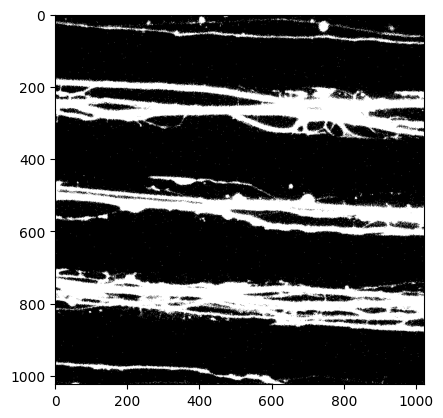

In [22]:
plt.imshow(mask,cmap='gray')

In [48]:
mask = np.flipud(mask)

In [47]:
def image_output(frame,trajectory,item):
    # Initialize plot
    plt.imshow(frame,cmap="gray")
    # plt.gca().invert_yaxis() # Plotting the y axis inverts it by default, so it must be inverted again
    bbox_props = dict(boxstyle="round", fc="w", ec="w")
    arrow_props = dict(arrowstyle="simple")

    trajectories = []
    if isinstance(item, bool):
        for item in set(trajectory.rejoined_particle):
            trajectories.append(item)
    else:
        trajectories.append(item)

    for item in trajectories: # Loop for each sub trajectory
        x = trajectory[trajectory.rejoined_particle==item].x
        y = trajectory[trajectory.rejoined_particle==item].y
        plt.plot(x,y,lw=0.5)
        if len(trajectories)>1:
            x0,y0 = x.iloc[0],y.iloc[0]
            plt.annotate(str(item),xy=(x0,y0),xytext=(x0+30,y0+30),bbox=bbox_props,arrowprops=arrow_props, size = 4)

    plt.show()
    plt.close()

In [5]:
trajs = pd.read_csv(r'/home/lumin/Documents/Test Devrim Results - 20231205_120023 40 msd 3/Test Devrim/20231123_KG_Exp46_Transport_CS6C_pos3007.nd2/20231123_KG_Exp46_Transport_CS6C_pos3007.nd2_rejoined.csv',sep='\t')
trajs.head()

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static
0,0,260.039196,372.001005,408.084570,1.851795,0.072335,27.889197,410.596603,0.017807,0,20,1621.296345,20,103,4
1,1,260.834862,370.860171,417.587029,1.759145,0.070223,33.687027,419.547897,0.015536,1,20,1621.296345,20,103,4
2,2,260.725021,369.993283,436.533377,1.764588,0.030391,34.270252,439.406647,0.014530,2,20,1621.296345,20,103,4
3,3,260.481088,369.223544,388.559518,1.767391,0.114678,31.210263,380.362808,0.014702,3,20,1621.296345,20,103,4
4,4,261.391360,368.153550,368.213791,1.829330,0.065624,25.986003,368.586563,0.016846,4,20,1621.296345,20,103,4


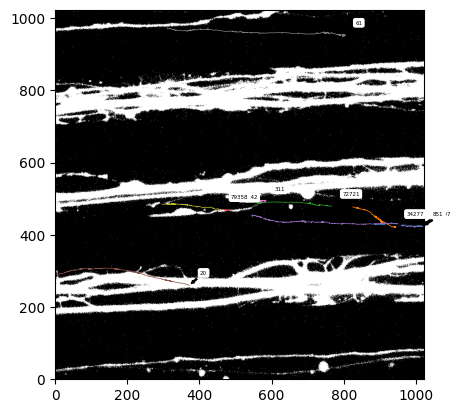

In [47]:
image_output(mask,trajs,True)

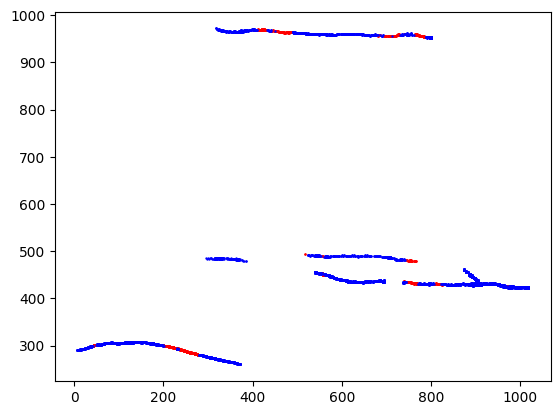

In [9]:
in_x = []
out_x = []
in_y = []
out_y = []

for traj in set(trajs.rejoined_particle):
    traj = trajs[trajs.rejoined_particle==traj]
    for x,y in zip(traj.x, traj.y):
        if mask[int(x),int(y)]==4096:
            in_x.append(x)
            in_y.append(y)
        else:
            out_x.append(x)
            out_y.append(y)
    plt.scatter(in_x,in_y,c='r',s=0.5)
    plt.scatter(out_x,out_y,c='b',s=0.5)

In [33]:
mask_list = []


for x,y in zip(trajs.x, trajs.y):
    if mask[int(x),int(y)]==4096:
        mask_list.append('in')
    else:
        mask_list.append('out')

trajs['gfp_mask'] = mask_list
trajs


,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static,gfp_mask
0,0,260.039196,372.001005,408.084570,1.851795,0.072335,27.889197,410.596603,0.017807,0,20,1621.296345,20,103,4,out
1,1,260.834862,370.860171,417.587029,1.759145,0.070223,33.687027,419.547897,0.015536,1,20,1621.296345,20,103,4,out
2,2,260.725021,369.993283,436.533377,1.764588,0.030391,34.270252,439.406647,0.014530,2,20,1621.296345,20,103,4,out
3,3,260.481088,369.223544,388.559518,1.767391,0.114678,31.210263,380.362808,0.014702,3,20,1621.296345,20,103,4,out
4,4,261.391360,368.153550,368.213791,1.829330,0.065624,25.986003,368.586563,0.016846,4,20,1621.296345,20,103,4,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,4390,971.294574,320.492248,46.024209,1.868756,0.112184,3.389380,45.333374,0.085243,937,30606,2378.386537,61,103,4,out
4391,4391,971.732733,318.519520,50.965020,1.718125,0.215075,4.438395,49.853790,0.085214,938,30606,2378.386537,61,103,4,out
4392,4392,969.932075,312.886792,46.236170,1.826431,0.160507,3.663998,39.344894,0.100481,940,30606,2378.386537,61,103,4,out
4393,4393,973.707650,310.532787,63.591725,1.607700,0.234097,6.949915,58.829315,0.078754,944,30606,2378.386537,61,103,4,out


In [29]:
trajs[trajs.gfp_mask=='in']

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static,gfp_mask
44,44,423.233399,1001.838114,346.204447,1.810252,0.062248,25.710271,348.346939,0.014744,653,3584,201.787558,3584,11,2,in
45,45,423.314538,1001.308017,414.004738,1.781613,0.035488,30.172957,415.192856,0.014522,654,3584,201.787558,3584,11,2,in
237,237,423.911349,1001.114867,445.395852,1.682448,0.070009,39.177628,447.699234,0.013825,848,3584,201.787558,3584,11,2,in
276,276,426.653982,973.496460,361.490487,1.733072,0.122746,30.070890,356.297806,0.013803,887,3584,201.787558,3584,11,2,in
277,277,426.464885,972.893101,305.245430,1.773011,0.087411,24.472754,304.974075,0.017144,888,3584,201.787558,3584,11,2,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,3475,481.691928,746.233937,70.680750,1.714845,0.119765,6.404351,67.836166,0.067631,872,5023,500.667216,5023,11,2,in
3476,3476,481.238231,743.022825,79.434569,1.661428,0.027796,7.365545,78.129776,0.052318,873,5023,500.667216,5023,11,2,in
3681,3681,488.782123,556.829609,69.072594,1.775847,0.279592,5.016445,68.136810,0.075550,1087,5023,500.667216,5023,11,2,in
3682,3682,489.070552,555.714724,59.586263,1.597544,0.080000,6.031738,59.189026,0.071230,1088,5023,500.667216,5023,11,2,in


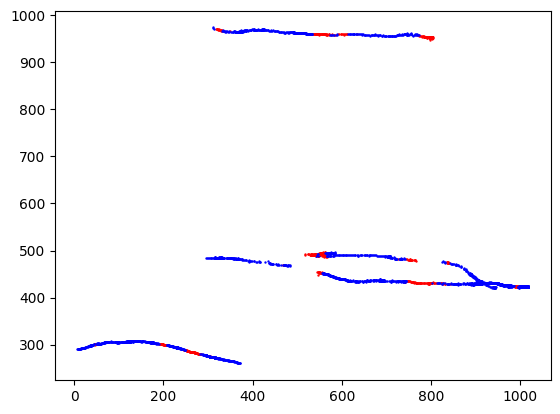

In [18]:
for traj in set(trajs.rejoined_particle):
    traj = trajs[trajs.rejoined_particle==traj]
    t_in = traj[traj.gfp_mask=='in']
    t_out = traj[traj.gfp_mask=='out']
    plt.scatter(t_in.x,t_in.y,c='r',s=0.5)
    plt.scatter(t_out.x,t_out.y,c='b',s=0.5)

In [34]:
for traj in set(trajs.rejoined_particle):
    traj = trajs[trajs.rejoined_particle==traj]
    ratio = len(traj[traj.gfp_mask=='in'])/len(traj)
    print(f'Trajectory number {traj.rejoined_particle.unique()} : {round(ratio*100,2)}')

Trajectory number [51907] : 1.89
Trajectory number [34277] : 0.0
Trajectory number [72721] : 7.76
Trajectory number [77042] : 100.0
Trajectory number [851] : 7.36
Trajectory number [20] : 21.19
Trajectory number [311] : 20.53
Trajectory number [61] : 21.62
Trajectory number [79358] : 0.87


In [1]:
name = '20231123_KG_Exp46_Transport_CS6C_pos1_007.nd2'

In [5]:
name[:-7]+'GFP.tif'

'20231123_KG_Exp46_Transport_CS6C_pos1_GFP.tif'

In [43]:
trajs

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static,gfp_mask
0,0,423.177333,1017.806936,372.022182,1.701752,0.111077,30.591742,373.935989,0.015187,609,3584,201.787558,3584,11,2,out
1,1,423.753963,1017.104467,325.496219,1.801876,0.080574,23.333483,325.966019,0.019684,610,3584,201.787558,3584,11,2,out
2,2,423.184105,1016.228035,328.911313,1.735276,0.096874,25.876809,330.459869,0.013555,611,3584,201.787558,3584,11,2,out
3,3,423.331585,1016.073436,345.008394,1.737450,0.122112,26.499333,344.927094,0.012878,612,3584,201.787558,3584,11,2,out
4,4,423.619565,1016.359903,330.889791,1.794045,0.117662,23.844313,332.474060,0.013673,613,3584,201.787558,3584,11,2,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,3752,490.744578,528.946988,54.142445,1.599699,0.165343,5.870868,54.426712,0.077538,1187,5023,500.667216,5023,11,2,out
3753,3753,491.607018,526.196491,59.055392,1.735087,0.185487,5.180298,58.176025,0.070437,1188,5023,500.667216,5023,11,2,out
3754,3754,492.685801,524.800604,62.277856,1.770862,0.300006,5.080067,63.622818,0.073442,1189,5023,500.667216,5023,11,2,out
3755,3755,492.515337,523.644172,56.052591,1.705279,0.113648,5.330154,54.798691,0.080970,1190,5023,500.667216,5023,11,2,out


In [46]:
trajs['x_i'] = trajs.x.apply(lambda x: 1024 - x)
trajs['y_i'] = trajs.y.apply(lambda x: 1024 - x)

trajs

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static,gfp_mask,x_i,y_i
0,0,423.177333,1017.806936,372.022182,1.701752,0.111077,30.591742,373.935989,0.015187,609,3584,201.787558,3584,11,2,out,6.193064,600.822667
1,1,423.753963,1017.104467,325.496219,1.801876,0.080574,23.333483,325.966019,0.019684,610,3584,201.787558,3584,11,2,out,6.895533,600.246037
2,2,423.184105,1016.228035,328.911313,1.735276,0.096874,25.876809,330.459869,0.013555,611,3584,201.787558,3584,11,2,out,7.771965,600.815895
3,3,423.331585,1016.073436,345.008394,1.737450,0.122112,26.499333,344.927094,0.012878,612,3584,201.787558,3584,11,2,out,7.926564,600.668415
4,4,423.619565,1016.359903,330.889791,1.794045,0.117662,23.844313,332.474060,0.013673,613,3584,201.787558,3584,11,2,out,7.640097,600.380435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,3752,490.744578,528.946988,54.142445,1.599699,0.165343,5.870868,54.426712,0.077538,1187,5023,500.667216,5023,11,2,out,495.053012,533.255422
3753,3753,491.607018,526.196491,59.055392,1.735087,0.185487,5.180298,58.176025,0.070437,1188,5023,500.667216,5023,11,2,out,497.803509,532.392982
3754,3754,492.685801,524.800604,62.277856,1.770862,0.300006,5.080067,63.622818,0.073442,1189,5023,500.667216,5023,11,2,out,499.199396,531.314199
3755,3755,492.515337,523.644172,56.052591,1.705279,0.113648,5.330154,54.798691,0.080970,1190,5023,500.667216,5023,11,2,out,500.355828,531.484663


In [15]:
def image_output_i(frame,trajectory,item):
    # Initialize plot
    plt.imshow(frame,cmap="gray")
    # plt.gca().invert_yaxis() # Plotting the y axis inverts it by default, so it must be inverted again
    bbox_props = dict(boxstyle="round", fc="w", ec="w")
    arrow_props = dict(arrowstyle="simple")

    trajectories = []
    if isinstance(item, bool):
        for item in set(trajectory.rejoined_particle):
            trajectories.append(item)
    else:
        trajectories.append(item)

    for item in trajectories: # Loop for each sub trajectory
        x = trajectory[trajectory.rejoined_particle==item].x
        y = trajectory[trajectory.rejoined_particle==item].y
        plt.plot(x,y,lw=0.5)
        if len(trajectories)>1:
            x0,y0 = x.iloc[0],y.iloc[0]
            plt.annotate(str(item),xy=(x0,y0),xytext=(x0+30,y0+30),bbox=bbox_props,arrowprops=arrow_props, size = 4)

    plt.show()


In [94]:
img = imageio.imread(r'/home/lumin/Documents/Test Devrim/MAX_20231123_KG_Exp46_Transport_CS6C_pos3008.tif')

/tmp/ipykernel_845756/98024213.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(r'/home/lumin/Documents/Test Devrim/MAX_20231123_KG_Exp46_Transport_CS6C_pos3008.tif')


In [53]:
plt.imshow(img,cmap='gray')

In [54]:
image_output_i(img,trajs,False)

In [84]:
mask = img

In [85]:
threshold = 120
mask[mask >= threshold] = 4096
mask[mask < threshold] = 0

In [86]:
plt.imshow(mask,cmap='gray')

In [61]:
image_output_i(mask,trajs,False)

In [63]:
mask_list = []

for x,y in zip(trajs.x, trajs.y):
    if mask[int(y),int(x)]==4096:
        mask_list.append('in')
    else:
        mask_list.append('out')

trajs['gfp_mask'] = mask_list
trajs


,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static,gfp_mask
0,0,260.039196,372.001005,408.084570,1.851795,0.072335,27.889197,410.596603,0.017807,0,20,1621.296345,20,103,4,in
1,1,260.834862,370.860171,417.587029,1.759145,0.070223,33.687027,419.547897,0.015536,1,20,1621.296345,20,103,4,in
2,2,260.725021,369.993283,436.533377,1.764588,0.030391,34.270252,439.406647,0.014530,2,20,1621.296345,20,103,4,in
3,3,260.481088,369.223544,388.559518,1.767391,0.114678,31.210263,380.362808,0.014702,3,20,1621.296345,20,103,4,in
4,4,261.391360,368.153550,368.213791,1.829330,0.065624,25.986003,368.586563,0.016846,4,20,1621.296345,20,103,4,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,4390,971.294574,320.492248,46.024209,1.868756,0.112184,3.389380,45.333374,0.085243,937,30606,2378.386537,61,103,4,in
4391,4391,971.732733,318.519520,50.965020,1.718125,0.215075,4.438395,49.853790,0.085214,938,30606,2378.386537,61,103,4,out
4392,4392,969.932075,312.886792,46.236170,1.826431,0.160507,3.663998,39.344894,0.100481,940,30606,2378.386537,61,103,4,out
4393,4393,973.707650,310.532787,63.591725,1.607700,0.234097,6.949915,58.829315,0.078754,944,30606,2378.386537,61,103,4,in


In [62]:
traj311 = trajs[trajs.rejoined_particle==311]
traj311

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static,gfp_mask
1531,1531,491.901235,579.205761,40.127481,1.512635,0.360724,5.119144,34.514496,0.102212,3,311,3.636607,311,103,4,out
1532,1532,494.194757,582.977528,42.050078,1.756742,0.283900,3.779782,40.404907,0.101408,4,311,3.636607,311,103,4,out
1533,1533,493.114114,583.903904,49.891835,1.665766,0.251165,4.644585,48.568161,0.079270,7,311,3.636607,311,103,4,out
1534,1534,492.951574,582.181598,58.472598,1.673754,0.381352,5.946366,46.504639,0.098275,12,311,3.636607,311,103,4,out
1535,1535,495.843537,584.761905,43.774627,1.786190,0.174243,3.573439,44.254013,0.089690,17,311,3.636607,311,103,4,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,2619,491.178030,532.768939,47.201235,1.745123,0.244474,3.933436,47.522858,0.084403,231,6377,8.572706,311,103,4,out
2620,2620,490.845824,532.687366,70.519943,1.634741,0.130960,6.493271,70.179062,0.081276,232,6377,8.572706,311,103,4,out
2621,2621,490.511482,532.586639,64.834000,1.531847,0.117915,7.309052,53.833405,0.092667,233,6377,8.572706,311,103,4,out
2622,2622,490.201087,532.998188,61.387625,1.728910,0.310094,6.116521,51.498718,0.081785,234,6377,8.572706,311,103,4,out


In [91]:
ratio_list = []

for traj in set(trajs.rejoined_particle):
    traj = trajs[trajs.rejoined_particle==traj]
    ratio = len(traj[traj.gfp_mask=='in'])/len(traj)
    ratio_list.extend([ratio]*len(traj))
    print(f'Trajectory number {traj.rejoined_particle.unique()} : {round(ratio*100,2)}')

trajs['ratio'] = ratio_list

Trajectory number [51907] : 100.0
Trajectory number [34277] : 76.45
Trajectory number [72721] : 99.07
Trajectory number [77042] : 100.0
Trajectory number [851] : 97.92
Trajectory number [20] : 52.18
Trajectory number [311] : 100.0
Trajectory number [61] : 53.06
Trajectory number [79358] : 96.54


In [92]:
trajs

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static,gfp_mask,ratio
0,0,260.039196,372.001005,408.084570,1.851795,0.072335,27.889197,410.596603,0.017807,0,20,1621.296345,20,103,4,in,1.000000
1,1,260.834862,370.860171,417.587029,1.759145,0.070223,33.687027,419.547897,0.015536,1,20,1621.296345,20,103,4,in,1.000000
2,2,260.725021,369.993283,436.533377,1.764588,0.030391,34.270252,439.406647,0.014530,2,20,1621.296345,20,103,4,in,1.000000
3,3,260.481088,369.223544,388.559518,1.767391,0.114678,31.210263,380.362808,0.014702,3,20,1621.296345,20,103,4,in,1.000000
4,4,261.391360,368.153550,368.213791,1.829330,0.065624,25.986003,368.586563,0.016846,4,20,1621.296345,20,103,4,in,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,4390,971.294574,320.492248,46.024209,1.868756,0.112184,3.389380,45.333374,0.085243,937,30606,2378.386537,61,103,4,in,0.965368
4391,4391,971.732733,318.519520,50.965020,1.718125,0.215075,4.438395,49.853790,0.085214,938,30606,2378.386537,61,103,4,out,0.965368
4392,4392,969.932075,312.886792,46.236170,1.826431,0.160507,3.663998,39.344894,0.100481,940,30606,2378.386537,61,103,4,out,0.965368
4393,4393,973.707650,310.532787,63.591725,1.607700,0.234097,6.949915,58.829315,0.078754,944,30606,2378.386537,61,103,4,in,0.965368


In [2]:
import imageio

In [5]:
img = imageio.imread('/home/lumin/Documents/Test Devrim/20231123_KG_Exp46_Transport_CS6C_pos3_GFP.tif')

/tmp/ipykernel_850100/67996876.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/home/lumin/Documents/Test Devrim/20231123_KG_Exp46_Transport_CS6C_pos3_GFP.tif')


In [2]:
import argparse

In [1]:
input_folder = r'/media/lumin/DATA/Demo_BioProbe/'

In [3]:
def main():
    parser = argparse.ArgumentParser(prog='M.I.N.T',description='Intraneuronal nanoparticle tracking')
    parser.add_argument('-f','--folder',default=input_folder if input_folder else os.getcwd(),help='Path to data folder')

In [4]:
main()

In [1]:
import os

In [4]:
lambda input_folder: input_folder if input_folder else os.getcwd()

<function __main__.<lambda>(input_folder)>

In [ ]:
parser.add_argument('-f', '--folder', default=lambda: input_folder if input_folder else os.getcwd(), help='Path to data folder')
parser.add_argument('-f', '--folder', default=lambda: input_folder if input_folder else os.getcwd(), help='Path to data folder')

In [95]:
import yaml

In [6]:
from io import StringIO
import pandas as pd

In [1]:
tstring = '             Condition 1  Condition 2  Condition 3\nCondition 1     1.000000     0.016173     0.004242\nCondition 2     0.016173     1.000000     0.454330\nCondition 3     0.004242     0.454330     1.000000\n'

In [5]:
tio = StringIO(tstring)
tio

In [8]:
df = pd.read_csv(tio,sep='\s+')
df

,Condition,1,Condition.1,2,Condition.2,3
0,Condition,1,1.000000,0.016173,0.004242,NaN
1,Condition,2,0.016173,1.000000,0.454330,NaN
2,Condition,3,0.004242,0.454330,1.000000,NaN


In [96]:
testd = {'a':1,'b':2}

In [98]:
with open(r'test.yml', 'w') as f:
    yaml.dump(testd,f)


In [1]:
from output import dict_dump_yaml, dict_load_yaml

In [2]:
testd = {'a':1,'b':2,'c':3}

In [3]:
dict_dump_yaml(testd,r'','test')

In [4]:
dict_load_yaml(r'','test')

{'a': 1, 'b': 2, 'c': 3}

In [3]:
import os
import pandas as pd

def data_extraction(input_folder):

    path_list = []

    for path, subfolder, files in os.walk(input_folder): # Scan entire folder structure for files
        for name in files:
            if name.endswith('_rejoined.csv') == False:  # Check for correct file
                continue

            # Build output file path
            file_path = os.path.join(path, name)
            path_list.append(file_path)

    print("Per phase calculations of :")

    for (path, j) in zip(path_list,[j for j in range(len(path_list))]):
        data = pd.read_csv(path,sep='\t')
        for trajectory in set(data.rejoined_particle):
            subdata = data[data.rejoined_particle==trajectory]
            print(path)
            print(trajectory)
            print(subdata.ratio.unique())


In [ ]:
data_extraction(r'/media/lumin/DATA/DATA_DEVRIM Results - 20231214_132940 gfp ok')

In [11]:
str('/media/lumin/DATA/DATA_DEVRIM/Batch 1/Condition 1/CS6C/')

'/media/lumin/DATA/DATA_DEVRIM/Batch 1/Condition 1/CS6C/'

In [ ]:
[0.8703703703703703]*150

In [13]:
import pandas as pd
data = pd.read_csv(r'/media/lumin/DATA/DATA_DEVRIM Results - 20231213_192215/DATA_DEVRIM/Batch 1/Condition 1/CS6C/20231123_KG_Exp46_Transport_CS6C_pos1_000.nd2/20231123_KG_Exp46_Transport_CS6C_pos1_000.nd2_rejoined.csv',sep='\t')
data

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static,GFP_mask,ratio,streak
0,0,617.328682,369.041860,67.155350,1.742759,0.190539,5.622308,65.380646,0.054456,0,51,69.003161,51,113,2,out,0.000000,21
1,1,618.415971,368.667461,90.194177,1.779904,0.110386,7.310136,90.324509,0.046033,1,51,69.003161,51,113,2,out,0.000000,21
2,2,617.497992,369.046185,67.888248,1.717498,0.107041,6.270802,63.098648,0.055626,2,51,69.003161,51,113,2,out,0.000000,21
3,3,617.954357,367.470954,64.175381,1.782231,0.346677,5.592046,63.358765,0.056401,3,51,69.003161,51,113,2,out,0.000000,21
4,4,620.126761,366.769953,41.998001,1.829595,0.220924,3.056193,43.264420,0.071137,4,51,69.003161,51,113,2,out,0.000000,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4580,4580,600.065407,524.263081,71.579224,1.673146,0.230525,6.866612,65.709244,0.048621,630,61671,17.682863,61671,113,2,out,0.679144,126
4581,4581,600.746107,524.587001,77.479466,1.908538,0.267915,6.032592,67.894791,0.043217,632,61671,17.682863,61671,113,2,out,0.679144,126
4582,4582,603.738710,523.290323,47.434767,1.720840,0.310065,4.858238,37.389008,0.072783,633,61671,17.682863,61671,113,2,out,0.679144,126
4583,4583,602.091528,522.563389,63.830149,1.780295,0.159388,5.605369,52.737610,0.055176,634,61671,17.682863,61671,113,2,out,0.679144,126


In [ ]:
for t in set(data.rejoined_particle):
    print(t)

In [ ]:
for t in data.rejoined_particle.unique():
    print(t)

In [3]:
import os
import pandas as pd
from pathlib import Path
import nd2

def get_file_list(input_folder, extension):

    path_list = []
    name_list = []

    if input_folder.endswith(f'{extension}'):
        path_list.append(Path(input_folder))
        name_list.append(Path(input_folder).name)

    else:
        for path, subfolder, files in os.walk(input_folder): # Scan entire folder structure for files
                for name in files:
                    if name.endswith(f'{extension}') == False:  # Check for correct file extension
                        continue # Skip to next file if not correct extension        

                    file_path = os.path.join(path, name) # Get file path of current file
                    path_list.append(file_path) # Append to file path list
                    name_list.append(name)
    
    return path_list, name_list

In [2]:
import imageio.v3 as imageio
from pathlib import Path

def GFP_mask2(path,name,trajectories):

    folder = Path(path).parent
    img = name[:-7]+'GFP.tif'

    try:
        img = imageio.imread(Path(folder).joinpath(img))
        # print('File found !')

    except FileNotFoundError:
        # print('File not found')
        # print(Path(folder).joinpath(img))
        return trajectories

    threshold = 120
    mask = img
    mask[mask >= threshold] = 4096
    mask[mask < threshold] = 0
    
    mask_list = []

    for x,y in zip(trajectories.x, trajectories.y):
        if mask[int(y),int(x)]==4096:
            mask_list.append('in')
        else:
            mask_list.append('out')

    trajectories['GFP_mask'] = mask_list

    ratio_list = []
    streak_list = []

    df = pd.DataFrame()

    for traj in trajectories.rejoined_particle.unique():
        traj = trajectories[trajectories.rejoined_particle==traj]
        ratio = len(traj[traj.GFP_mask=='in'])/len(traj)
        ratio = [ratio]*len(traj)
        ratio_list.extend(ratio)
        ratio = pd.DataFrame(ratio,columns=['ratio_df'])
        traj['ratio_df'] = ratio.values
        streak = longest_streak(list(traj.GFP_mask))
        streak = [streak]*len(traj)
        streak = pd.DataFrame(streak,columns=['streak_df'])
        streak_list.extend(streak)
        df = pd.concat((df,traj))
        print(traj)

    trajectories['ratio'] = ratio_list
    trajectories['streak'] = streak_list

    return df

In [5]:
def data_extraction(input_folder):

    path_list, name_list = get_file_list(str(input_folder), '_rejoined.csv')
    
    for (path, name) in zip(path_list,name_list): # Looping over file path list
        print(name)
        # print(path)
        new_path = path.replace(str(input_folder),'/media/lumin/DATA')
        new_path = new_path.replace('_rejoined.csv','')
        new_path = new_path.replace((name.replace('_rejoined.csv','')),'',1)
        new_path = new_path.replace('//','/')
        new_path = new_path.replace('.nd2 ','.nd2')
        # print(new_path)
        new_path = Path(new_path)
        processed_trajectory = pd.read_csv(path,sep='\t')
        try:
            processed_trajectory = processed_trajectory.drop(columns=['ratio','streak','GFP_mask'])
        except KeyError:
            processed_trajectory = processed_trajectory
        processed_trajectory = GFP_mask2(path,name,processed_trajectory)
        processed_trajectory.to_csv(f'/media/lumin/DATA/TEST_GFP/{name}')

In [6]:
data_extraction(r'/media/lumin/DATA/DATA_DEVRIM Results - 20231214_132940 gfp ok')

20231123_KG_Exp46_Transport_CS6C_pos1_000.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos1_001.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos1_002.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos1_003.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos1_004.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos1_005.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos1_006.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos1_007.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos2_001.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos2_002.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos2_003.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos2_004.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos2_005.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos3_000.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos3_001.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos3_003.nd2_rejoined.csv
20231123_KG_Exp46_Transport_CS6C_pos3_004.nd2_rejoined.c

In [4]:
def data_extraction(input_folder):

    path_list, name_list = get_file_list(str(input_folder), '_rejoined.csv')
    ratio_list = []
    for (path, name) in zip(path_list,name_list): # Looping over file path list
        processed_trajectory = pd.read_csv(path,sep='\t')
        for traj in processed_trajectory.rejoined_particle.unique():
            traj = processed_trajectory[processed_trajectory.rejoined_particle==traj]
            try:
                ratio_list.append(traj.ratio_df.unique())
            except AttributeError:
                continue
    return ratio_list
            


In [5]:
rl = data_extraction(r'/media/lumin/DATA/DATA_DEVRIM Results - 20231214_132940 gfp ok/DATA_DEVRIM_GFP')

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 760 BarContainer objects>)

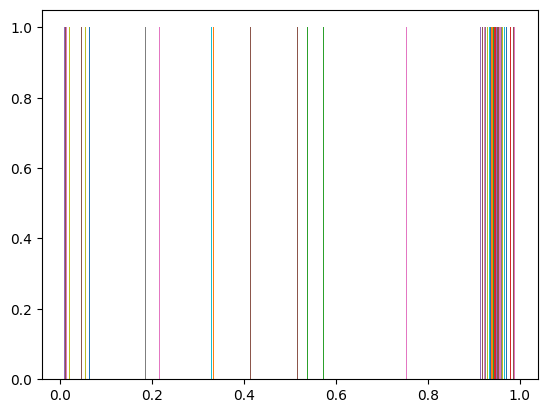

In [7]:
import matplotlib.pyplot as plt
plt.hist(rl)


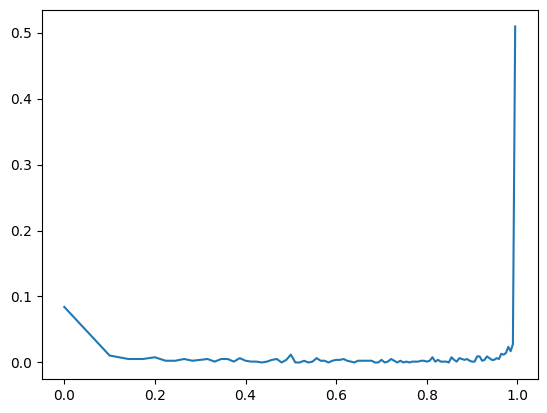

In [8]:
import numpy as np
counts, bins = np.histogram(rl,bins=100)
len(bins)
bins = bins[:-1]
plt.plot(np.sqrt(bins),counts/sum(counts))
# plt.show()
# plt.close

In [40]:
path = r'media/lumin/DATA/DATA_DEVRIM Results - 20231214_132940 gfp ok/DATA_DEVRIM_GFP Results - 20231215_121142/GFP positive/log.txt'
with open(path) as f:
        lines = f.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'media/lumin/DATA/DATA_DEVRIM Results - 20231214_132940 gfp ok/DATA_DEVRIM_GFP Results - 20231215_121142/GFP positive/log.txt'

In [43]:
import pandas as pd
df = pd.read_csv(r'/media/lumin/DATA/DATA_DEVRIM Results - 20231214_132940 gfp ok/p_data.csv')
df.head()

,Unnamed: 0,trajectory,phase,phase_number,phase_length,vectorial_velocity,curvilign_velocity,phase_duration,run_length,intensity,...,rejoined_trajectory,animal,file,min_x,max_x,min_y,max_y,n_particles,n_static,gfp
0,0,39,0,102,2,1.113547,0.783494,0.10,0.078349,54.122087,...,39,Condition 3,20231123_KG_Exp46_Transport_CS4C_pos3_005.nd2_...,44.816252,23.563791,68.503551,68.527186,109,13,False
1,1,39,2,53,1,-0.000000,-0.492104,0.05,-0.024605,117.139438,...,39,Condition 3,20231123_KG_Exp46_Transport_CS4C_pos3_005.nd2_...,44.816252,23.563791,68.503551,68.527186,109,13,True
2,2,39,2,71,7,-0.417316,-0.907070,0.35,-0.317474,83.748633,...,39,Condition 3,20231123_KG_Exp46_Transport_CS4C_pos3_005.nd2_...,44.816252,23.563791,68.503551,68.527186,109,13,False
3,3,39,0,72,1,-0.000000,-1.154060,0.05,-0.057703,83.954613,...,39,Condition 3,20231123_KG_Exp46_Transport_CS4C_pos3_005.nd2_...,44.816252,23.563791,68.503551,68.527186,109,13,False
4,4,39,2,73,1,-0.000000,-0.557362,0.05,-0.027868,88.984856,...,39,Condition 3,20231123_KG_Exp46_Transport_CS4C_pos3_005.nd2_...,44.816252,23.563791,68.503551,68.527186,109,13,False


In [45]:
df[df.phase_number==0]

,Unnamed: 0,trajectory,phase,phase_number,phase_length,vectorial_velocity,curvilign_velocity,phase_duration,run_length,intensity,...,rejoined_trajectory,animal,file,min_x,max_x,min_y,max_y,n_particles,n_static,gfp
81,81,39,0,0,2,1.055213,1.403845,0.1,0.140384,46.662571,...,39,Condition 3,20231123_KG_Exp46_Transport_CS4C_pos3_005.nd2_...,44.816252,23.563791,68.503551,68.527186,109,13,False
143,143,39,0,0,2,1.055213,1.403845,0.1,0.140384,46.662571,...,39,Condition 3,20231123_KG_Exp46_Transport_CS4C_pos3_005.nd2_...,44.816252,23.563791,68.503551,68.527186,109,13,True


In [9]:
data = {'a':1,'b':2,'c':3}


In [ ]:
for k,v in data:
    print(k)
    print(v)

In [6]:
for i in data.keys():
    print(i)

a
b
c


In [11]:
def shift(data):
    data['a'] = str(data['a'])
    print('shift')

In [12]:
data['a']

1

In [13]:
shift(data)

shift


In [14]:
data['a']

'1'

In [15]:
from pathlib import Path

p = Path('/qsdqsd')
type(p)

pathlib.PosixPath

In [12]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'/media/lumin/DATA/Demo_BioProbe Results - 20231213_161702 ok/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HET/larve3/oeil_droit/190205_nanoKTP_kif5a.lif - Series006.tif/190205_nanoKTP_kif5a.lif - Series006.tif_rejoined.csv',sep='\t')

In [3]:
data

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static
0,0,229.663939,283.397954,1955.0,1.977754,0.233723,207.0,1955.0,0.0,0,29,10.345836,29,73,81
1,1,229.538642,283.718970,2135.0,2.274592,0.167154,207.0,2135.0,0.0,1,29,10.345836,29,73,81
2,2,229.510138,284.151392,3699.0,2.387903,0.148729,234.0,3699.0,0.0,2,29,10.345836,29,73,81
3,3,230.049242,283.848485,1056.0,2.030543,0.355884,133.0,1056.0,0.0,3,29,10.345836,29,73,81
4,4,228.948768,283.964981,1542.0,1.917054,0.098045,133.0,1542.0,0.0,4,29,10.345836,29,73,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4048,4048,206.495546,183.496659,898.0,1.977884,0.283508,207.0,898.0,0.0,1760,10730,133.599992,10730,73,81
4049,4049,206.161555,182.981928,1826.0,2.121708,0.058722,207.0,1826.0,0.0,1761,10730,133.599992,10730,73,81
4050,4050,206.376982,183.427110,1955.0,2.176132,0.161288,186.0,1955.0,0.0,1762,10730,133.599992,10730,73,81
4051,4051,206.852459,183.196156,1769.0,2.103592,0.185307,234.0,1769.0,0.0,1763,10730,133.599992,10730,73,81


In [4]:
def rej_start_end(tracks, item):

    subtrack = tracks[tracks.particle==item]
    df_temp = subtrack[subtrack.frame==np.min(subtrack.frame)]
    df_start = pd.concat((df_start,df_temp),ignore_index=True)

    df_temp = subtrack[subtrack.frame==np.max(subtrack.frame)]
    df_end = pd.concat((df_end,df_temp),ignore_index=True)

    df_start = df_start.sort_values(by = 'frame', ascending=False)
    df_end = df_end.sort_values(by = 'frame', ascending=False)

    return df_start, df_end

In [9]:

subtrack = data[data.particle==46]
print(len(subtrack))

1765


In [17]:
%%timeit

df_start = pd.DataFrame()
df_end = pd.DataFrame()
n_rejoined = 0
df_temp = subtrack[subtrack.frame==np.min(subtrack.frame)]
df_start = pd.concat((df_start,df_temp),ignore_index=True)

699 µs ± 1.65 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
%%timeit
df_end = pd.DataFrame()
df_temp = subtrack[subtrack.frame==np.max(subtrack.frame)]
df_end = pd.concat((df_end,df_temp),ignore_index=True)

534 µs ± 701 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [37]:
df_start = pd.DataFrame()
df_end = pd.DataFrame()
n_rejoined = 0
for item in set(data.particle):
    df_temp = subtrack[subtrack.frame==np.min(subtrack.frame)]
    df_start = pd.concat((df_start,df_temp),ignore_index=True)
    df_temp = subtrack[subtrack.frame==np.max(subtrack.frame)]
    df_end = pd.concat((df_end,df_temp),ignore_index=True)

In [38]:
%time df_start = df_start.sort_values(by = 'frame', ascending=False)

CPU times: user 1.51 ms, sys: 0 ns, total: 1.51 ms
Wall time: 1.31 ms


In [39]:
%time df_end = df_end.sort_values(by = 'frame', ascending=False)

CPU times: user 1.46 ms, sys: 0 ns, total: 1.46 ms
Wall time: 1.29 ms


In [7]:
parallelize = True

In [8]:
if parallelize is True:
    print('ok')
elif parallelize is False:
    print('not ok')

ok


In [1]:
import pandas as pd
from joblib import Parallel, delayed
import numpy as np

In [2]:
def rejoining(tracks: pd.DataFrame,threshold_t: int,threshold_r: int,parallelize: bool):
    """Rejoins split trajectories.

    Joins trajectories whose start and end points are within set spatial and temporal threshold of each other.  
    
    This function does not generate additional data points, rejoined trajectories will be considered as one for statistical purposes thus reducing oversampling. 

    :param tracks: DataFrame containing trajectories.
    :type tracks: DataFrame
    :param threshold_t: Temporal threshold, in number of frames.
    :type threshold_t: int
    :param threshold_r: Spatial threshold, in pixels.
    :type threshold_r: int
    :return: DataFrame containing rejoined trajectories.
    :rtype: DataFrame
    """    

    df_start = pd.DataFrame()
    df_end = pd.DataFrame()
    n_rejoined = 0
    temp_tracks = tracks.copy()

    #Get first and last point of each trajectory
    for item in set(tracks.particle):

        subtrack = tracks[tracks.particle==item]
        df_temp = subtrack[subtrack.frame==np.min(subtrack.frame)]
        df_start = pd.concat((df_start,df_temp),ignore_index=True)

        df_temp = subtrack[subtrack.frame==np.max(subtrack.frame)]
        df_end = pd.concat((df_end,df_temp),ignore_index=True)

    df_start = df_start.sort_values(by = 'frame', ascending=False)
    df_end = df_end.sort_values(by = 'frame', ascending=False)

    if parallelize is True:
        rej_generator = Parallel(n_jobs=os.cpu_count(),return_as='generator')(delayed(rej_threshold)(linef, lined, threshold_t, threshold_r, df_start, df_end,
            temp_tracks, n_rejoined) for linef in df_end.itertuples() for lined in df_start.itertuples())

        for line, n_rej in rej_generator:
            n_rejoined += n_rej
            temp_tracks = line # pd.concat((temp_tracks,line),axis=0)

    elif parallelize is False:
        for linef in df_end.itertuples():
            for lined in df_start.itertuples():
                timed = lined.frame
                timef = linef.frame
                particle1 = linef.particle
                particle2 = lined.particle
                
                #Rejoins trajectories if they are within spatial and temporal range
                if (timed > timef) and (timed - timef < threshold_t):
                    xd,yd = lined.x,lined.y
                    xf,yf = linef.x,linef.y
                    r = np.sqrt((xf-xd)**2 + (yf-yd)**2) 
                    if r < threshold_r and particle1 != particle2:
                        
                        df_start.loc[df_start['particle']==particle2,'particle']=particle1
                        df_end.loc[df_end['particle']==particle2,'particle']=particle1
                        temp_tracks.loc[temp_tracks['particle']==particle2,'particle']=particle1
                        df_start = df_start.loc[(df_start['frame']!=timed)&(df_start['particle']!=particle1)]
                        df_end = df_end.loc[(df_end['frame']!=timef)&(df_end['particle']!=particle1)]
                        n_rejoined += 1
                        break
                # temp_tracks, n_rej = rej_threshold(linef, lined, threshold_t, threshold_r, df_start, df_end,
                #     temp_tracks, n_rejoined)
                
                # n_rejoined += n_rej
                # temp_tracks = line # pd.concat((temp_tracks,line),axis=0)


    temp_tracks.rename(columns = {'particle':'rejoined_particle'}, inplace = True)
    tracks = tracks.reset_index(drop=True)
    temp_tracks = temp_tracks.reset_index(drop=True)
    tracks = pd.concat([tracks,temp_tracks['rejoined_particle']],axis=1,join='inner')

    return tracks, n_rejoined

In [2]:
data = pd.read_csv(r'/media/lumin/DATA/Demo_BioProbe Results - 20240112_200645 rej non para ancien/Demo_BioProbe/Exp1_20190205_06_kif5a_nKTP/HOM/larve12/oeil_droit/190205_nanoKTP_kif5a.lif - Series108.tif/190205_nanoKTP_kif5a.lif - Series108.tif_rejoined.csv',sep='\t')
data

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static
0,0,59.998433,287.125392,638.0,2.473369,0.106974,133.0,638.0,0.0,922,9092,26.873064,9092,82,82
1,1,60.381323,286.485084,771.0,2.558524,0.147608,133.0,771.0,0.0,923,9092,26.873064,9092,82,82
2,2,60.300792,286.694811,1137.0,2.139999,0.189680,186.0,1137.0,0.0,924,9092,26.873064,9092,82,82
3,3,61.027254,286.788959,1431.0,2.322527,0.214723,133.0,1431.0,0.0,925,9092,26.873064,9092,82,82
4,4,60.230101,286.073806,691.0,1.922522,0.638846,159.0,691.0,0.0,926,9092,26.873064,9092,82,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,1607,236.526733,186.316832,505.0,2.222299,0.314479,133.0,505.0,0.0,2324,21572,16.735924,21572,82,82
1608,1608,235.650327,183.521242,612.0,2.789160,0.084984,80.0,612.0,0.0,2326,21572,16.735924,21572,82,82
1609,1609,238.132832,186.000000,399.0,2.311028,0.207355,80.0,399.0,0.0,2327,21572,16.735924,21572,82,82
1610,1610,238.828151,185.867430,611.0,2.629307,0.630529,133.0,611.0,0.0,2329,21572,16.735924,21572,82,82


In [3]:
trajs = data.copy()


In [5]:
df_start = pd.DataFrame()
df_end = pd.DataFrame()
n_rejoined = 0
temp_tracks = trajs.copy()

    #Get first and last point of each trajectory
for item in set(trajs.particle):

    subtrack = trajs[trajs.particle==item]
    df_temp = subtrack[subtrack.frame==np.min(subtrack.frame)]
    df_start = pd.concat((df_start,df_temp),ignore_index=True)

    df_temp = subtrack[subtrack.frame==np.max(subtrack.frame)]
    df_end = pd.concat((df_end,df_temp),ignore_index=True)

df_start = df_start.sort_values(by = 'frame', ascending=False)
df_end = df_end.sort_values(by = 'frame', ascending=False)

In [23]:
df_start

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static
2,1478,221.928375,163.073462,1089.0,2.659771,0.338894,160.0,1089.0,0.0,2169,21572,16.735924,21572,82,82
4,1206,165.924731,110.215054,372.0,2.360062,0.158060,80.0,372.0,0.0,1595,16021,9.321026,14477,82,82
6,496,323.779531,339.548705,4055.0,2.370857,0.042436,255.0,4055.0,0.0,1593,15998,16.687058,13787,82,82
3,379,309.078261,328.539130,345.0,1.900419,0.452659,80.0,345.0,0.0,1453,14477,9.011286,14477,82,82
5,250,244.713738,298.590944,1303.0,2.523565,0.158450,186.0,1303.0,0.0,1382,13787,12.474263,13787,82,82
0,209,181.366337,372.102970,505.0,2.437740,0.609498,80.0,505.0,0.0,992,9827,22.494836,9827,82,82
1,0,59.998433,287.125392,638.0,2.473369,0.106974,133.0,638.0,0.0,922,9092,26.873064,9092,82,82


In [10]:
df_end

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static
6,1205,304.336458,324.235417,1920.0,2.162175,0.264395,207.0,1920.0,0.0,2334,15998,16.687058,13787,82,82
2,1611,236.623529,187.004706,425.0,2.092002,0.570605,160.0,425.0,0.0,2330,21572,16.735924,21572,82,82
4,1477,169.800546,126.871585,366.0,1.877389,0.679444,127.0,366.0,0.0,1891,16021,9.321026,14477,82,82
3,495,314.500000,339.748826,426.0,2.092912,0.387712,80.0,426.0,0.0,1570,14477,9.011286,14477,82,82
5,378,232.635458,282.210159,1004.0,2.180363,0.048554,207.0,1004.0,0.0,1521,13787,12.474263,13787,82,82
1,208,65.518359,315.683585,926.0,1.926568,0.886754,234.0,926.0,0.0,1136,9092,26.873064,9092,82,82
0,249,192.314741,401.603586,1004.0,2.151160,0.349438,181.0,1004.0,0.0,1040,9827,22.494836,9827,82,82


In [6]:
threshold_t = 100
threshold_r = 400

# for linef in df_end.itertuples():
#     for lined in df_start.itertuples():
#         timed = lined.frame
#         timef = linef.frame
#         particle1 = linef.particle
#         particle2 = lined.particle
        
#         #Rejoins trajectories if they are within spatial and temporal range
#         if (timed > timef) and (timed - timef < threshold_t):
#             xd,yd = lined.x,lined.y
#             xf,yf = linef.x,linef.y
#             r = np.sqrt((xf-xd)**2 + (yf-yd)**2) 
#             if r < threshold_r and particle1 != particle2:
                
#                 df_start.loc[df_start['particle']==particle2,'particle']=particle1
#                 df_end.loc[df_end['particle']==particle2,'particle']=particle1
#                 temp_tracks.loc[temp_tracks['particle']==particle2,'particle']=particle1
#                 df_start = df_start.loc[(df_start['frame']!=timed)&(df_start['particle']!=particle1)]
#                 df_end = df_end.loc[(df_end['frame']!=timef)&(df_end['particle']!=particle1)]
#                 n_rejoined += 1
#                 print('rej')
#                 break

In [31]:
temp_tracks.loc[temp_tracks.particle==14477,'particle']

379     14477
380     14477
381     14477
382     14477
383     14477
        ...  
1473    14477
1474    14477
1475    14477
1476    14477
1477    14477
Name: particle, Length: 389, dtype: int64

In [32]:
temp_tracks

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static
0,0,59.998433,287.125392,638.0,2.473369,0.106974,133.0,638.0,0.0,922,9092,26.873064,9092,82,82
1,1,60.381323,286.485084,771.0,2.558524,0.147608,133.0,771.0,0.0,923,9092,26.873064,9092,82,82
2,2,60.300792,286.694811,1137.0,2.139999,0.189680,186.0,1137.0,0.0,924,9092,26.873064,9092,82,82
3,3,61.027254,286.788959,1431.0,2.322527,0.214723,133.0,1431.0,0.0,925,9092,26.873064,9092,82,82
4,4,60.230101,286.073806,691.0,1.922522,0.638846,159.0,691.0,0.0,926,9092,26.873064,9092,82,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,1607,236.526733,186.316832,505.0,2.222299,0.314479,133.0,505.0,0.0,2324,21572,16.735924,21572,82,82
1608,1608,235.650327,183.521242,612.0,2.789160,0.084984,80.0,612.0,0.0,2326,21572,16.735924,21572,82,82
1609,1609,238.132832,186.000000,399.0,2.311028,0.207355,80.0,399.0,0.0,2327,21572,16.735924,21572,82,82
1610,1610,238.828151,185.867430,611.0,2.629307,0.630529,133.0,611.0,0.0,2329,21572,16.735924,21572,82,82


In [7]:
def rej_threshold(linef, lined, threshold_t, threshold_r, df_start, df_end, temp_tracks, n_rejoined):

    timed = lined.frame
    timef = linef.frame
    particle1 = linef.particle
    particle2 = lined.particle

    #Rejoins trajectories if they are within spatial and temporal range
    if (timed > timef) and (timed - timef < threshold_t):
        xd,yd = lined.x,lined.y
        xf,yf = linef.x,linef.y
        r = np.sqrt((xf-xd)**2 + (yf-yd)**2) 
        if r < threshold_r and particle1 != particle2:
            
            df_start.loc[df_start['particle']==particle2,'particle']=particle1
            df_end.loc[df_end['particle']==particle2,'particle']=particle1
            temp_tracks.loc[temp_tracks['particle']==particle2,'particle']=particle1
            df_start = df_start.loc[(df_start['frame']!=timed)&(df_start['particle']!=particle1)]
            df_end = df_end.loc[(df_end['frame']!=timef)&(df_end['particle']!=particle1)]
            n_rejoined += 1
            return temp_tracks, n_rejoined

    return temp_tracks, n_rejoined

In [12]:
import os
n_rejoined = 0
rej_generator = Parallel(n_jobs=os.cpu_count(),return_as='list')(delayed(rej_threshold)(linef, lined, threshold_t, threshold_r, df_start, df_end,
    temp_tracks, n_rejoined) for linef in df_end.itertuples() for lined in df_start.itertuples())

In [9]:
original = temp_tracks.copy()

In [ ]:
for line, n_rej in rej_generator:
    n_rejoined += n_rej
    # print(f'LINE : {len(line.loc[line.particle==14477])}')
    # if len(line.loc[line.particle==14477]) == 827:
    #     print(line)
    differences = original.compare(line)
    if differences.empty is False:
        print(differences.particle.self.iloc[0])
        print(differences.particle.other.iloc[0])
        temp_tracks.particle.loc[temp_tracks.particle == differences.particle.self.iloc[0]] = differences.particle.other.iloc[0]

    # print(f'TEMP : {len(temp_tracks.loc[temp_tracks.particle==14477])}')

In [11]:
len(temp_tracks.loc[temp_tracks.particle==14477])

1099

In [13]:
temp_tracks.particle.unique()

array([ 9092,  9827, 13787, 21572])

In [23]:
temp_tracks.particle[temp_tracks.particle==14477]

379    14477
380    14477
381    14477
382    14477
383    14477
       ...  
491    14477
492    14477
493    14477
494    14477
495    14477
Name: particle, Length: 117, dtype: int64

In [28]:
modified_tracks = temp_tracks.copy()
modified_tracks.particle[modified_tracks.particle==9092] = 14477
len(modified_tracks.particle[modified_tracks.particle==14477])

/tmp/ipykernel_208734/3082065163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_tracks.particle[modified_tracks.particle==9092] = 14477


326

In [47]:
differences = temp_tracks.compare(modified_tracks)
type(differences)

pandas.core.frame.DataFrame

In [51]:
differences.particle.self[0]

9092.0

In [42]:
if differences is None:
    print('a')

In [14]:
import trackpy as tp

In [15]:
data

,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,max_msd,rejoined_particle,n_particles,n_static
0,0,59.998433,287.125392,638.0,2.473369,0.106974,133.0,638.0,0.0,922,9092,26.873064,9092,82,82
1,1,60.381323,286.485084,771.0,2.558524,0.147608,133.0,771.0,0.0,923,9092,26.873064,9092,82,82
2,2,60.300792,286.694811,1137.0,2.139999,0.189680,186.0,1137.0,0.0,924,9092,26.873064,9092,82,82
3,3,61.027254,286.788959,1431.0,2.322527,0.214723,133.0,1431.0,0.0,925,9092,26.873064,9092,82,82
4,4,60.230101,286.073806,691.0,1.922522,0.638846,159.0,691.0,0.0,926,9092,26.873064,9092,82,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,1607,236.526733,186.316832,505.0,2.222299,0.314479,133.0,505.0,0.0,2324,21572,16.735924,21572,82,82
1608,1608,235.650327,183.521242,612.0,2.789160,0.084984,80.0,612.0,0.0,2326,21572,16.735924,21572,82,82
1609,1609,238.132832,186.000000,399.0,2.311028,0.207355,80.0,399.0,0.0,2327,21572,16.735924,21572,82,82
1610,1610,238.828151,185.867430,611.0,2.629307,0.630529,133.0,611.0,0.0,2329,21572,16.735924,21572,82,82


In [31]:
cols = list(data.columns)

In [21]:
cols

['Unnamed: 0',
 'y',
 'x',
 'mass',
 'size',
 'ecc',
 'signal',
 'raw_mass',
 'ep',
 'frame',
 'particle',
 'max_msd',
 'rejoined_particle',
 'n_particles',
 'n_static']

In [32]:
cols.remove('x')
cols.remove('y')
cols.remove('frame')
cols

['Unnamed: 0',
 'mass',
 'size',
 'ecc',
 'signal',
 'raw_mass',
 'ep',
 'particle',
 'max_msd',
 'rejoined_particle',
 'n_particles',
 'n_static']

In [33]:
coords = data.drop(cols,axis=1)
coords

,y,x,frame
0,59.998433,287.125392,922
1,60.381323,286.485084,923
2,60.300792,286.694811,924
3,61.027254,286.788959,925
4,60.230101,286.073806,926
...,...,...,...
1607,236.526733,186.316832,2324
1608,235.650327,183.521242,2326
1609,238.132832,186.000000,2327
1610,238.828151,185.867430,2329


In [42]:
tp.quiet([True])

In [44]:
%%timeit
raw_trajectory = tp.link(coords, search_range=6, adaptive_step=0.9, adaptive_stop=5,memory=5,link_strategy='numba')

114 ms ± 358 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
%%timeit
raw_trajectory = tp.link(coords, search_range=6, adaptive_step=0.9, adaptive_stop=5,memory=5,link_strategy='recursive')

114 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%%timeit
raw_trajectory = tp.link(coords, search_range=6, adaptive_step=0.9, adaptive_stop=5,memory=5,link_strategy='nonrecursive')

114 ms ± 239 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
%%timeit
raw_trajectory = tp.link(coords, search_range=6, adaptive_step=0.9, adaptive_stop=5,memory=5,link_strategy='hybrid')

114 ms ± 373 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%%timeit
raw_trajectory = tp.link(coords, search_range=6, adaptive_step=0.9, adaptive_stop=5,memory=5,link_strategy='auto')

114 ms ± 398 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
class BaseParameter():

    def __init__(self, go_stop=None, antero_retro=None):
        self.results = []
        self.name = 'Base parameter'
        self.column_name = 'base'
        self.antero_retro = antero_retro
        self.go_stop = go_stop

    def append_to_results(self, result):
        self.results.append(result)

    def calculate_results(self, data):
        pass

    def get_results_len(self):
        return len(self.results)

    def return_column(self):
        return pd.DataFrame(self.results, columns=[self.column_name])

In [10]:
class BBase(BaseParameter):
    def __init__(self, **kwargs):
        super().__init__()
        self.name = 'aaa'

In [18]:
aa = BaseParameter()
type(aa.results)

list

In [11]:
tes = BBase(antero_retro='retro')

In [12]:
tes.antero_retro

In [4]:
tes.name

'aaa'

In [13]:
type([])

list

In [14]:
BBase.results

AttributeError: type object 'BBase' has no attribute 'results'

In [20]:
temp_dict = {'curv_velocity_antero': 1,
                    'curv_velocity_retro': 2,
                    'processivity_antero': 3,

                    }

In [21]:
for v in temp_dict:
    print(v)

curv_velocity_antero
curv_velocity_retro
processivity_antero


In [1]:
import pandas as pd

In [5]:
ip = r'/media/lumin/DATA/Demo_BioProbe Results - 20240131_104708/Demo_BioProbe Results - 20240205_132327 script/20240205_132327_Per phase parameters.csv'

In [26]:
df = pd.read_csv(ip,sep='\t')

In [27]:
df.reset_index(inplace=True, drop=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [30]:
df.head()

,trajectory,phase,phase_number,phase_length,vectorial_velocity,curvilign_velocity,phase_duration,run_length,intensity,variance,condition,slide,curv_length,rejoined_trajectory,animal,file,n_particles,n_static,gfp,theta_std
0,2,0,24,3,0.019815,0.050838,0.15,0.007626,2187.521569,90313.301992,WT,oeil_droit,0.002542,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,36.744844
1,2,2,43,24,0.310250,0.323739,1.20,0.388487,1787.555882,130242.402252,WT,oeil_droit,0.016187,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,17.847208
2,2,0,42,3,0.080969,0.230109,0.15,0.034516,1316.211765,168357.028097,WT,oeil_droit,0.011505,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,36.747353
3,2,2,41,110,-0.636461,-0.692287,5.50,-3.807579,2831.990481,582713.336321,WT,oeil_droit,-0.034614,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,20.781966
4,2,0,40,1,0.000000,0.008384,0.05,0.000419,2949.000000,0.000000,WT,oeil_droit,0.000419,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,NaN


In [9]:
df.phase

0       0
1       2
2       0
3       2
4       0
       ..
2130    0
2131    0
2132    0
2133    2
2134    0
Name: phase, Length: 2135, dtype: int64

In [8]:
df.index[df['phase'] == 0]

Index([   0,    2,    4,    6,    8,   10,   12,   13,   15,   17,
       ...
       2119, 2123, 2124, 2125, 2126, 2128, 2130, 2131, 2132, 2134],
      dtype='int64', length=1069)

In [31]:
df2 = df.loc[df['trajectory'] == 2]

In [32]:
df2.sort_values('phase_number')

,trajectory,phase,phase_number,phase_length,vectorial_velocity,curvilign_velocity,phase_duration,run_length,intensity,variance,condition,slide,curv_length,rejoined_trajectory,animal,file,n_particles,n_static,gfp,theta_std
41,2,0,0,3,0.024022,0.063242,0.15,0.009486,4808.333333,1.273502e+05,WT,oeil_droit,0.003162,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,36.782973
40,2,2,1,175,-0.057668,-0.065618,8.75,-0.574157,4174.049882,2.869538e+05,WT,oeil_droit,-0.003281,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,14.183713
39,2,0,2,4,0.007119,0.021361,0.20,0.004272,4019.517647,1.009915e+04,WT,oeil_droit,0.001068,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,32.783631
38,2,2,3,97,-0.045444,-0.067280,4.85,-0.326310,3577.655306,2.806312e+05,WT,oeil_droit,-0.003364,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,13.641725
37,2,0,4,2,0.005233,0.010466,0.10,0.001047,3154.000000,1.822500e+04,WT,oeil_droit,0.000523,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,45.000000
42,2,2,5,9,0.009304,0.010467,0.45,0.004710,2987.762527,1.626628e+05,WT,oeil_droit,0.000523,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,30.793317
36,2,0,6,3,0.006974,0.011465,0.15,0.001720,2920.600000,1.630959e+05,WT,oeil_droit,0.000573,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,36.867206
35,2,2,7,125,-0.025187,-0.025457,6.25,-0.159107,3357.546824,1.062870e+06,WT,oeil_droit,-0.001273,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,17.859697
34,2,0,8,2,-0.003710,-0.005375,0.10,-0.000538,5165.394118,9.291826e+03,WT,oeil_droit,-0.000269,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,45.000000
43,2,2,9,74,-0.034944,-0.053118,3.70,-0.196537,4628.372019,7.995370e+05,WT,oeil_droit,-0.002656,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,19.236786


In [34]:
df2.reset_index(inplace=True, drop=True)


In [35]:
df2.index[df2['phase'] == 0]

Index([ 0,  2,  4,  6,  8, 10, 12, 13, 15, 17, 19, 24, 26, 28, 30, 31, 33, 34,
       36, 37, 39, 41],
      dtype='int64')

In [15]:
df2.file.nunique()

1

In [37]:
df2.sort_values('phase_number', inplace=True)

/tmp/ipykernel_508223/4220033603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values('phase_number', inplace=True)


In [39]:
df2.reset_index(inplace=True, drop=True)


In [40]:
df2

,trajectory,phase,phase_number,phase_length,vectorial_velocity,curvilign_velocity,phase_duration,run_length,intensity,variance,condition,slide,curv_length,rejoined_trajectory,animal,file,n_particles,n_static,gfp,theta_std
0,2,0,0,3,0.024022,0.063242,0.15,0.009486,4808.333333,1.273502e+05,WT,oeil_droit,0.003162,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,36.782973
1,2,2,1,175,-0.057668,-0.065618,8.75,-0.574157,4174.049882,2.869538e+05,WT,oeil_droit,-0.003281,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,14.183713
2,2,0,2,4,0.007119,0.021361,0.20,0.004272,4019.517647,1.009915e+04,WT,oeil_droit,0.001068,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,32.783631
3,2,2,3,97,-0.045444,-0.067280,4.85,-0.326310,3577.655306,2.806312e+05,WT,oeil_droit,-0.003364,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,13.641725
4,2,0,4,2,0.005233,0.010466,0.10,0.001047,3154.000000,1.822500e+04,WT,oeil_droit,0.000523,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,45.000000
5,2,2,5,9,0.009304,0.010467,0.45,0.004710,2987.762527,1.626628e+05,WT,oeil_droit,0.000523,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,30.793317
6,2,0,6,3,0.006974,0.011465,0.15,0.001720,2920.600000,1.630959e+05,WT,oeil_droit,0.000573,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,36.867206
7,2,2,7,125,-0.025187,-0.025457,6.25,-0.159107,3357.546824,1.062870e+06,WT,oeil_droit,-0.001273,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,17.859697
8,2,0,8,2,-0.003710,-0.005375,0.10,-0.000538,5165.394118,9.291826e+03,WT,oeil_droit,-0.000269,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,45.000000
9,2,2,9,74,-0.034944,-0.053118,3.70,-0.196537,4628.372019,7.995370e+05,WT,oeil_droit,-0.002656,2,larve5,190205_nanoKTP_kif5a.lif - Series031.tif_rejoi...,24,23,False,19.236786


In [47]:
df2.index[df2['phase'] == 0]

Index([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42],
      dtype='int64')

In [55]:
zeomask = df2.index[df2['phase'] == 0]

In [43]:
type(id)

pandas.core.indexes.base.Index

In [46]:
id[-1]

42

In [48]:
df2.iloc[0].phase

0

In [59]:
df2.iloc[zeomask[1]].phase

0

In [56]:
if df2.iloc[zeomask[0]].phase == 0:
    print('zeo')

zeo


In [61]:
df2.iloc[zeomask[-1]].phase_number

42

In [62]:
for p in zeomask:
    print(p)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
